In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import netCDF4
from global_land_mask import globe
from scipy.optimize import curve_fit
import matplotlib as mpl
import nc_time_axis
mpl.rcParams['figure.dpi']= 500

plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [5,4]
mpl.rcParams['axes.linewidth'] = 1

In [2]:
a = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/pr_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
b = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/pr_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc'
c = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/prw_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
d = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/prw_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc'

pr = [a,b]
prw = [c,d]
cesmpr = xr.open_mfdataset(pr)
cesmprw = xr.open_mfdataset(prw)
cesm = cesmpr.merge(cesmprw, compat='override')

/home/rakshith/miniconda3/envs/myenv/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/rakshith/miniconda3/envs/myenv/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'prw' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [3]:
model5 = '/media/rakshith/Seagate Expansion Drive/Good models/NESM3/*.nc'
nesm = xr.open_mfdataset(model5)

model6 = '/media/rakshith/Seagate Expansion Drive/Good models/BCC-CSM2-MR/*.nc'
bcc = xr.open_mfdataset(model6)

model7 = '/media/rakshith/Seagate Expansion Drive/Good models/E3SM-1-0/*.nc'
e3sm = xr.open_mfdataset(model7)

model8 = '/media/rakshith/Seagate Expansion Drive/Good models/GFDL-ESM4/*.nc'
gfdl = xr.open_mfdataset(model8)

model9 = '/media/rakshith/Seagate Expansion Drive/Good models/IPSL-CM6A-LR/*.nc'
ipsl = xr.open_mfdataset(model9)

model10 = '/media/rakshith/Seagate Expansion Drive/Good models/MRI-ESM2-0/*.nc'
mri = xr.open_mfdataset(model10)

h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
ds = xr.open_dataset(h)

In [3]:
model3 = '/media/rakshith/Seagate Expansion Drive/Good models/INM-CM5-0/*.nc'
inm = xr.open_mfdataset(model3)

model4 = '/media/rakshith/Seagate Expansion Drive/Good models/MIROC6/*.nc'
miroc = xr.open_mfdataset(model4)

In [3]:
model2 = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC/*.nc'
cmcc = xr.open_mfdataset(model2)

# Seasonal cycle comparison

In [6]:
year=input('Enter a year between 1959-2014 to compare\n')

Enter a year between 1959-2014 to compare
2014


In [7]:
grid1 = cmcc.sel(time=year, lat=slice(10,30), lon=slice(70,90))
grid2 = nesm.sel(time=year, lat=slice(10,30), lon=slice(70,90))
grid3 = miroc.sel(time=year, lat=slice(10,30), lon=slice(70,90))
ds2 = ds.sel(time=year)

In [8]:
lon_grid1, lat_grid1 = np.meshgrid(grid1.lon, grid1.lat)
mask1 = globe.is_land(lat_grid1, lon_grid1)
lon_grid2, lat_grid2 = np.meshgrid(grid2.lon, grid2.lat)
mask2 = globe.is_land(lat_grid2, lon_grid2)
lon_grid3, lat_grid3 = np.meshgrid(grid3.lon, grid3.lat)
mask3 = globe.is_land(lat_grid3, lon_grid3)
#ERA mask
lon_grid, lat_grid = np.meshgrid(ds.longitude, ds.latitude)
eramask = globe.is_land(lat_grid, lon_grid)

In [9]:
Pwat1 = grid1.prw.where(mask1>0).mean(dim=['lat', 'lon']).squeeze()
Pr1 = 86400*grid1.pr.where(madsk1>0).mean(dim=['lat', 'lon']).squeeze()
Pwat2 = grid2.prw.where(mask2>0).mean(dim=['lat', 'lon']).squeeze()
Pr2 = 86400*grid2.pr.where(mask2>0).mean(dim=['lat', 'lon']).squeeze()
Pwat3 = grid3.prw.where(mask3>0).mean(dim=['lat', 'lon']).squeeze()
Pr3 = 86400*grid3.pr.where(mask3>0).mean(dim=['lat', 'lon']).squeeze()

ds3 = ds2.where(eramask>0).mean(dim=['longitude', 'latitude']).squeeze()

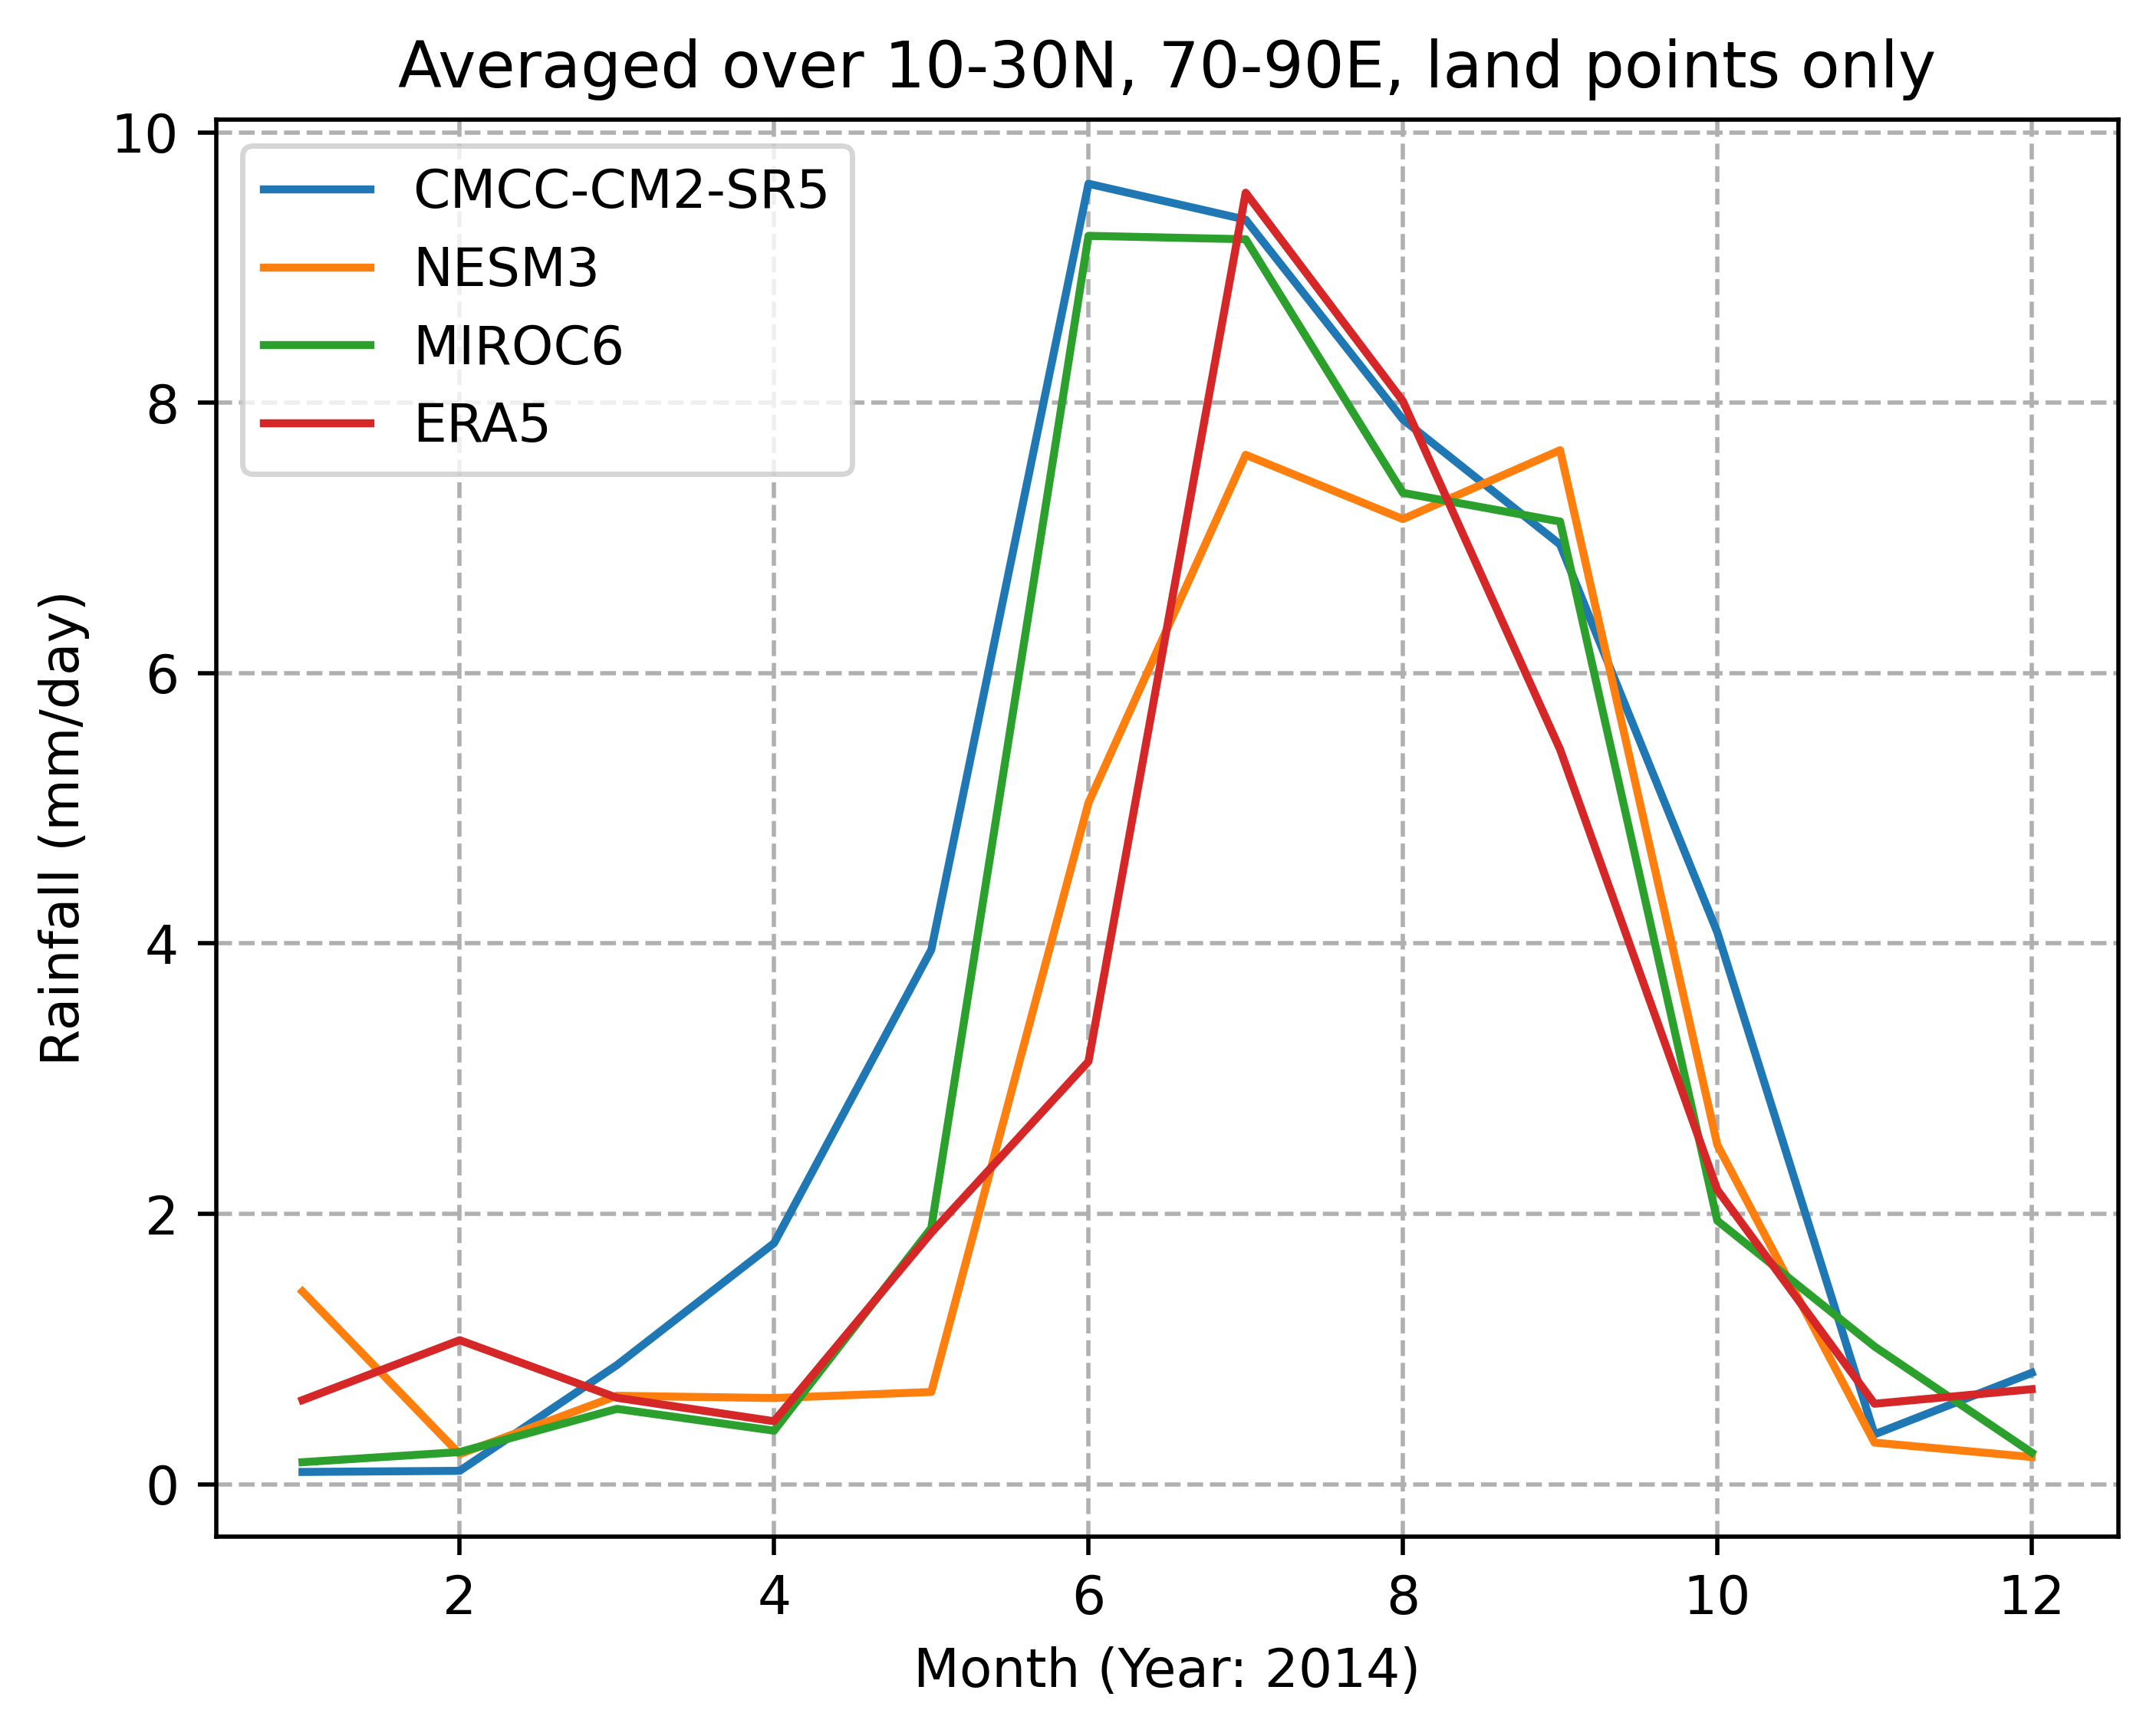

In [10]:
X = np.linspace(1, 12, 12, dtype='int')
plt.plot(X, Pr1, label='CMCC-CM2-SR5')
plt.plot(X, Pr2, label='NESM3')
plt.plot(X, Pr3, label='MIROC6')
plt.plot(X, 86400*ds3.mtpr, label='ERA5')
plt.legend()
plt.title('Averaged over 10-30N, 70-90E, land points only')
plt.xlabel('Month (Year: '+year+')')
plt.ylabel('Rainfall (mm/day)')
plt.grid(linestyle='--')

# P vs Pwat plot

In [25]:
data=inm #select model to compare
Name = 'INM-CM5-0'
#Name = 'CMCC-CM2-SR5'

In [26]:
region = str(input('Enter the region for comparision\n I=India, Af=South Africa, Am=South America\n'))
                   
if region=='I':
        lat1, lat2, lon1, lon2 = 10, 30, 70, 90
        region='India'
elif region=='Af':
        lat1, lat2, lon1, lon2 = -20, -5, 20, 40
        region='South Africa'
elif region=='Am':
        lat1, lat2, lon1, lon2 = -20, -10, 290, 310
        region='South America'
else:
    print('Please enter proper code')

Enter the region for comparision
 I=India, Af=South Africa, Am=South America
I


In [27]:
#For JJAS
jjas = data.time.dt.month.isin(range(6, 10))
clim = data.sel(time=jjas) #ds with only JJAS months
#For all months
#clim=data
clim2 = clim.sel(lat=slice(lat1,lat2), lon=slice(lon1,lon2))

In [28]:
year1='1990'
year2='2010'
year3='2070'
year4='2090'
grid1 = clim2.sel(time=slice(year1, year2))
grid2 = clim2.sel(time=slice(year3, year4))

l=[]
for i in grid1.lon:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
            
lon_grid, lat_grid = np.meshgrid(l, grid1.lat)
mask = globe.is_land(lat_grid, lon_grid)

In [29]:
#Qdiv1 = grid1.rsdt.where(mask>0).mean(dim=['lat', 'lon']) - grid1.rsut.where(mask>0).mean(dim=['lat', 'lon']) - grid1.rlut.where(mask>0).mean(dim=['lat', 'lon'])
#Qdiv2 = grid2.rsdt.where(mask>0).mean(dim=['lat', 'lon']) - grid2.rsut.where(mask>0).mean(dim=['lat', 'lon']) - grid2.rlut.where(mask>0).mean(dim=['lat', 'lon'])

In [30]:
Pwat1 = grid1.prw.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
Pr1 = 86400*grid1.pr.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
Pwat2 = grid2.prw.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
Pr2 = 86400*grid2.pr.where(mask>0).mean(dim=['lat', 'lon']).squeeze()

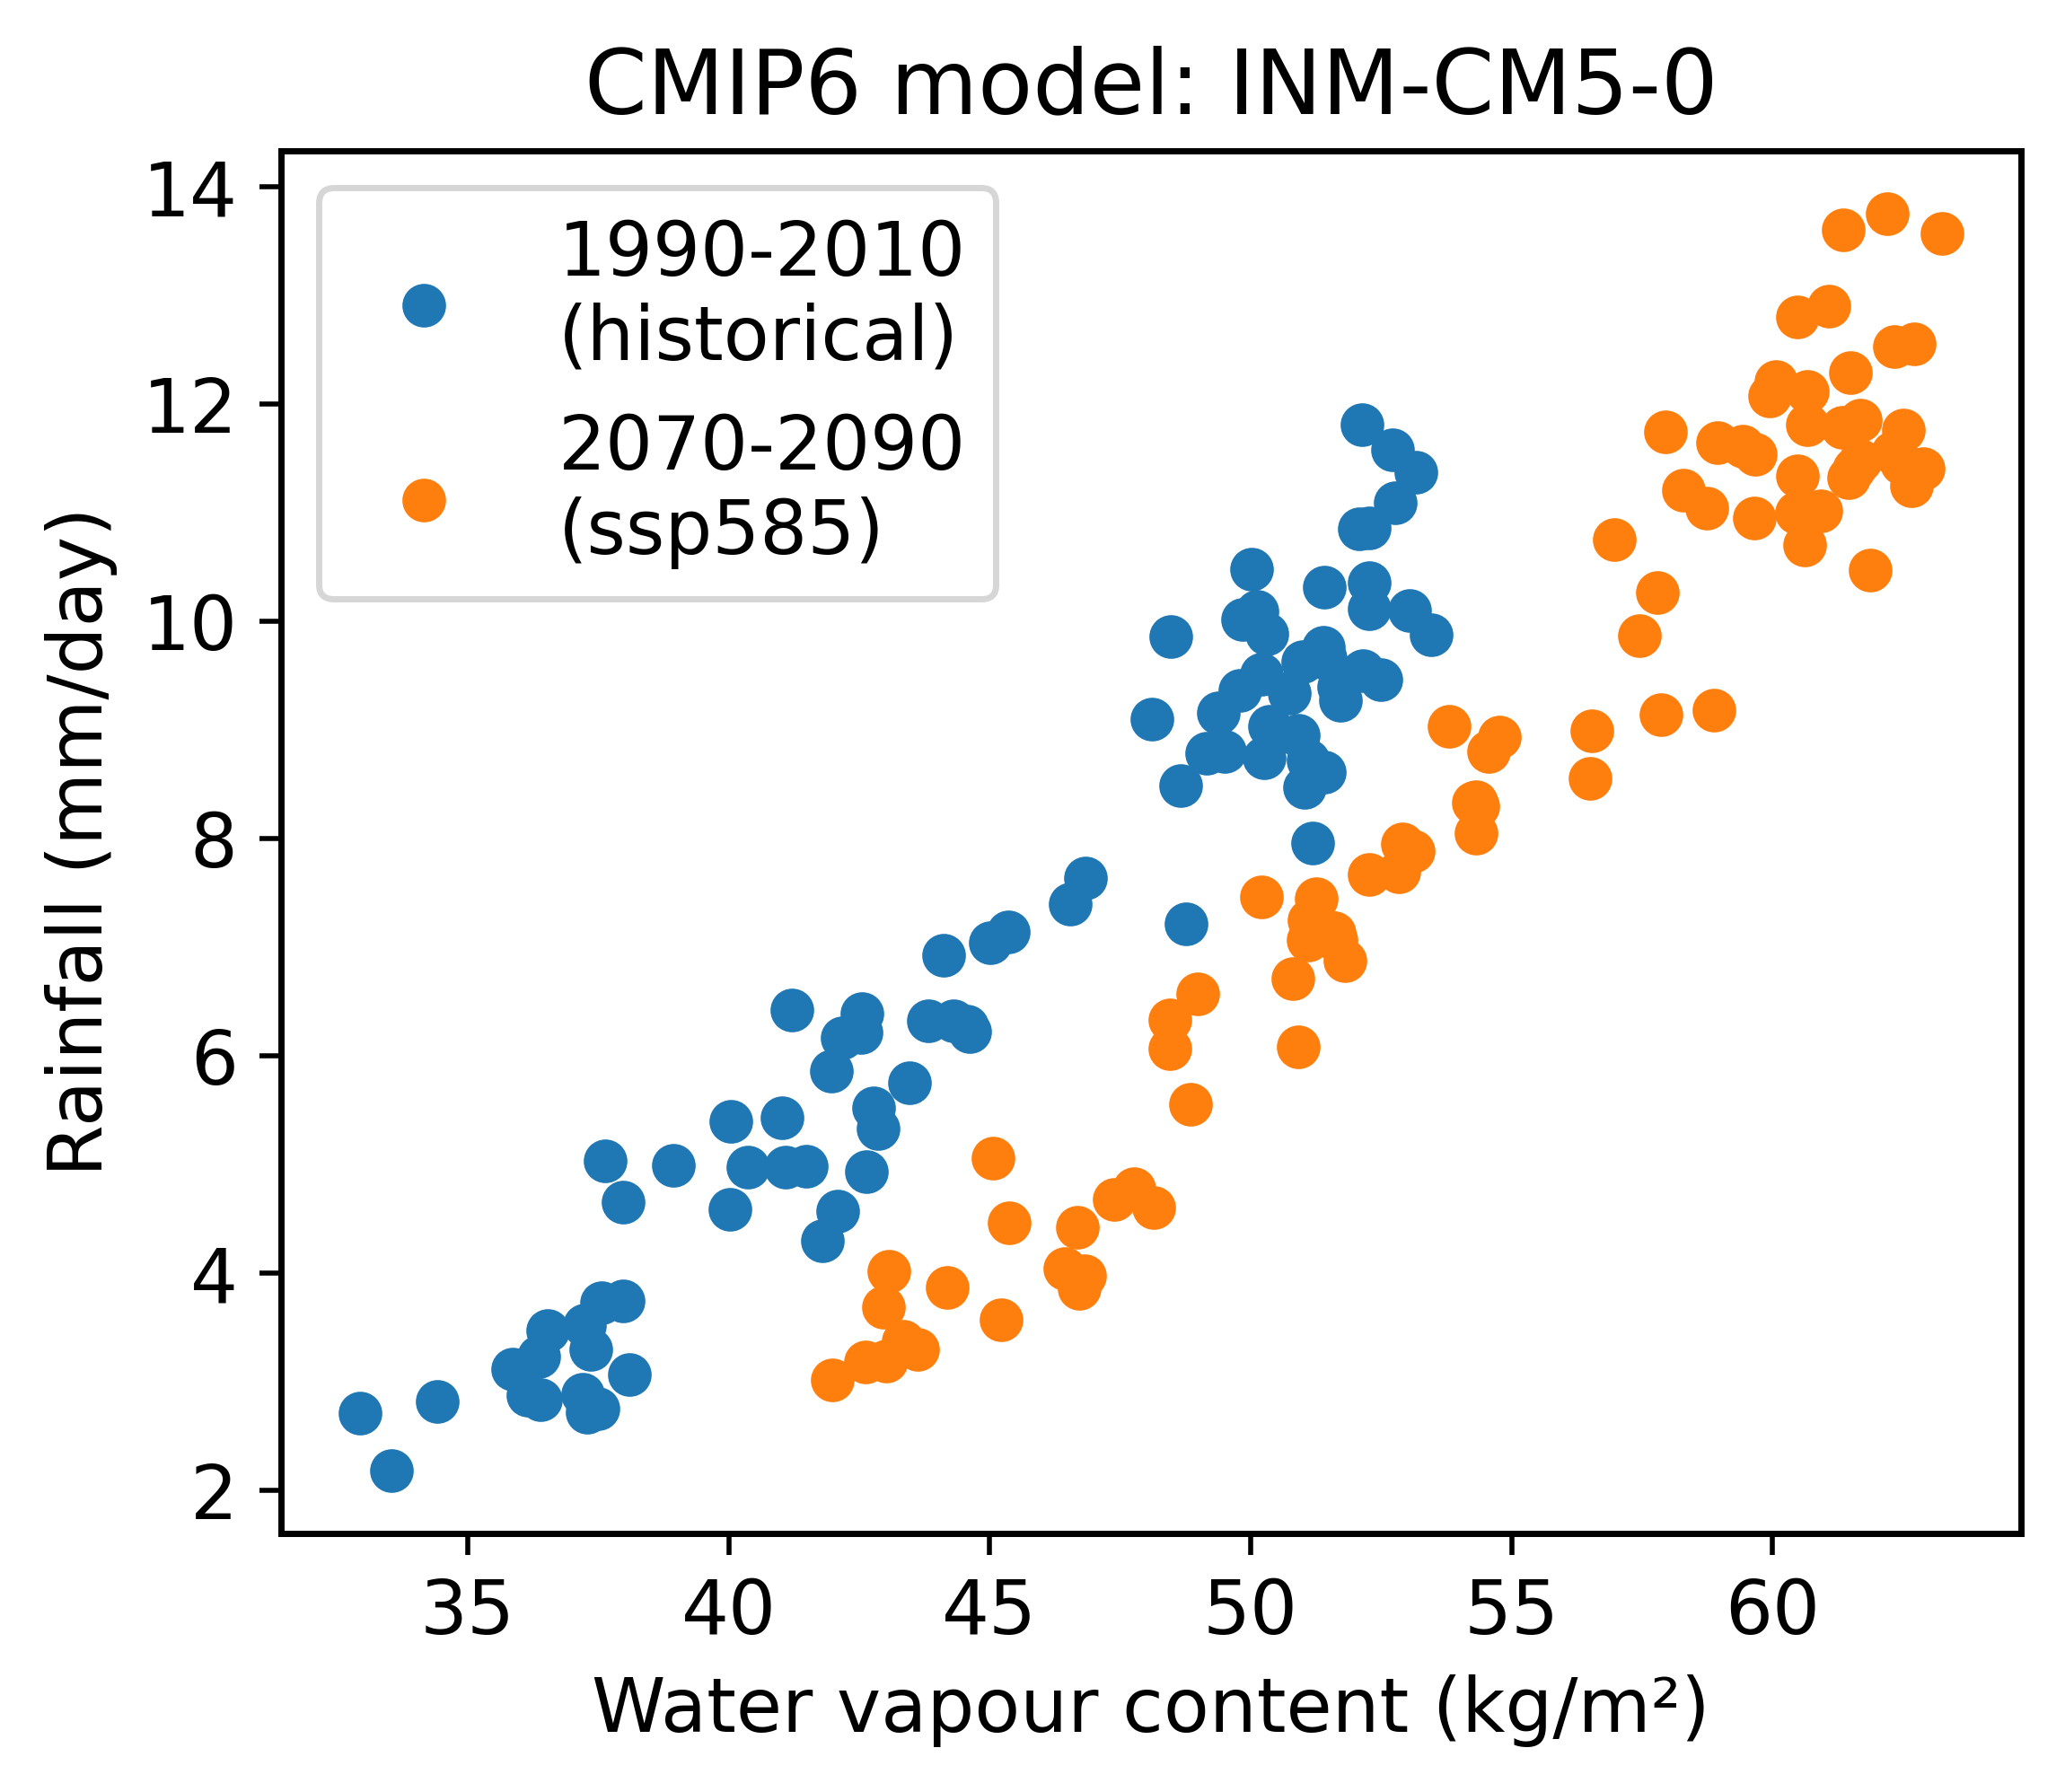

In [36]:


plt.scatter(Pwat1, Pr1, label=year1 + '-' + year2 + '\n(historical)')
plt.scatter(Pwat2, Pr2, label=year3 + '-' + year4 + '\n(ssp585)')
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title('CMIP6 model: ' + Name )#+ ', ' + region + " ({}-{}S, {}-{}E) ".format(abs(lat1), abs(lat2), abs(lon1), abs(lon2)))
#plt.title('Only months June-September')
plt.legend()
plt.show()

# All regions together comparision

In [40]:
lat1, lat2, lon1, lon2 = 10, 30, 70, 90
lat3, lat4, lon3, lon4 = -20, -5, 20, 40 # South Africa
lat5, lat6, lon5, lon6 = -20, -10, 290, 310 # South America

In [41]:
clim=inm

year1, year2='1990','2010'
#year1, year2='2070','2090'

grid1 = clim.sel(time=slice(year1, year2))

ind = grid1.sel(lat=slice(lat1,lat2), lon=slice(lon1,lon2))
af = grid1.sel(lat=slice(lat3,lat4), lon=slice(lon3,lon4))
am = grid1.sel(lat=slice(lat5,lat6), lon=slice(lon5,lon6))

l=[]
for i in am.lon:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
            
lon_grid, lat_grid = np.meshgrid(ind.lon, ind.lat)
indmask = globe.is_land(lat_grid, lon_grid)

lon_grid, lat_grid = np.meshgrid(af.lon, af.lat)
afmask = globe.is_land(lat_grid, lon_grid)

lon_grid, lat_grid = np.meshgrid(l, am.lat)
ammask = globe.is_land(lat_grid, lon_grid)

In [42]:
Pw1 = ind.prw.where(indmask>0).mean(dim=['lat', 'lon']).squeeze()
P1 = 86400*ind.pr.where(indmask>0).mean(dim=['lat', 'lon']).squeeze()

Pw2 = af.prw.where(afmask>0).mean(dim=['lat', 'lon']).squeeze()
P2 = 86400*af.pr.where(afmask>0).mean(dim=['lat', 'lon']).squeeze()

Pw3 = am.prw.where(ammask>0).mean(dim=['lat', 'lon']).squeeze()
P3 = 86400*am.pr.where(ammask>0).mean(dim=['lat', 'lon']).squeeze()

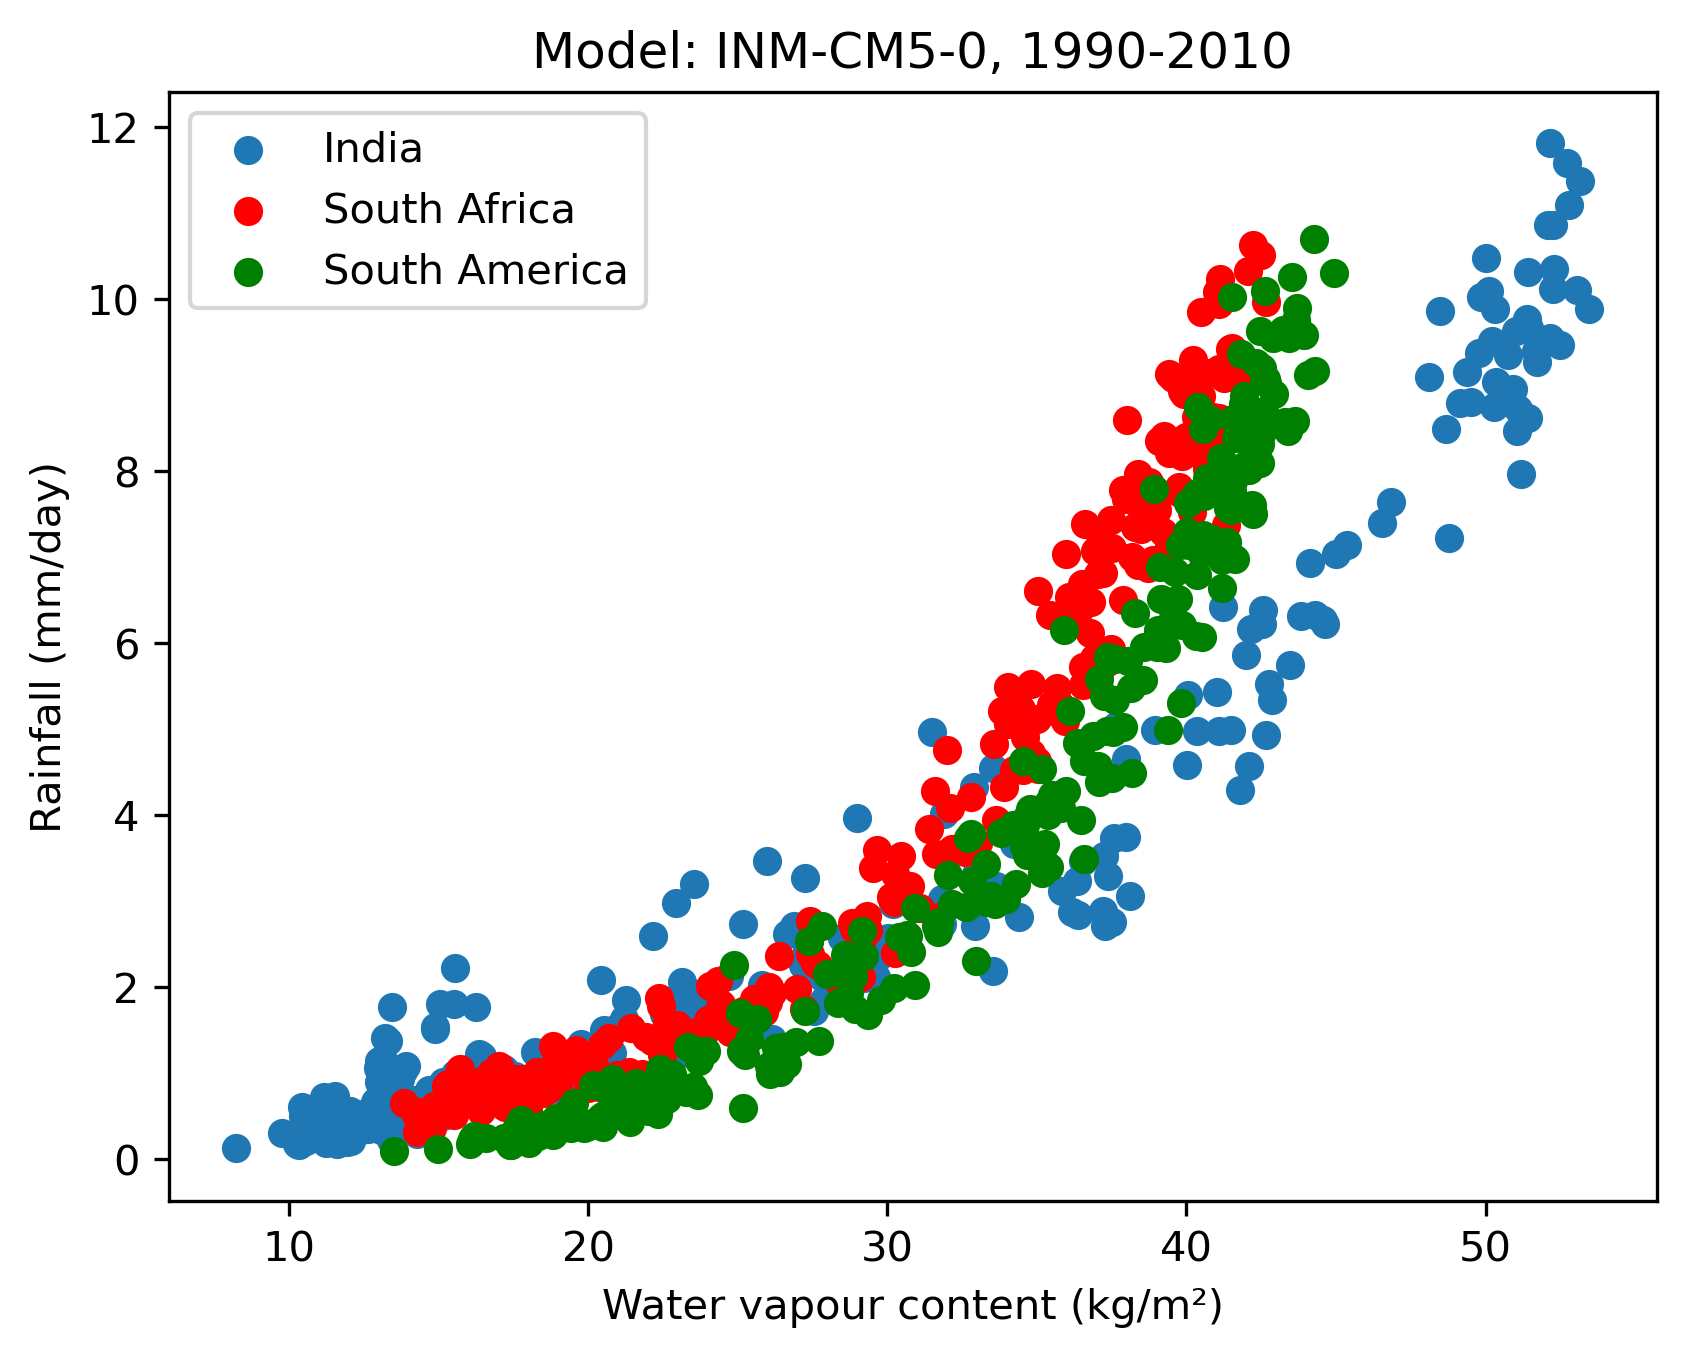

In [43]:
plt.scatter(Pw1, P1, label='India')
plt.scatter(Pw2, P2, label='South Africa', c='r')
plt.scatter(Pw3, P3, label='South America', c='g')
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title('Model: INM-CM5-0, '+year1+'-'+year2 )
#plt.title(Name + ', ' + region + " ({}-{}S, {}-{}E) ".format(abs(lat1), abs(lat2), abs(lon1), abs(lon2)))
plt.legend()
plt.show()

# Constant values

In [3]:
data=cmcc #select model to compare
grid1 = data.sel(lat=slice(10,30), lon=slice(70,90))

In [4]:
months = grid1.time.dt.month.isin(range(6, 10))
JJAS = grid1.sel(time=months)
#JJAS = grid1

In [7]:
JJAS = JJAS.groupby('time.year').mean('time')

In [8]:
#datetimeindex = JJAS.indexes['time'].to_datetimeindex()
#JJAS['time'] = datetimeindex

In [9]:
lon_grid1, lat_grid1 = np.meshgrid(grid1.lon, grid1.lat)
mask1 = globe.is_land(lat_grid1, lon_grid1)

In [11]:
year1='1850'
year2='2100'
year3='2070'
year4='2090'
ypwat = JJAS.prw.where(mask1>0).mean(dim=['lat', 'lon'])
yp = 86400*28.96*(JJAS.pr.where(mask1>0).mean(dim=['lat', 'lon'])-JJAS.evspsbl.where(mask1>0).mean(dim=['lat', 'lon']))
yq = JJAS.rsdt.where(mask1>0).mean(dim=['lat', 'lon']) - JJAS.rsut.where(mask1>0).mean(dim=['lat', 'lon']) - JJAS.rlut.where(mask1>0).mean(dim=['lat', 'lon'])
ypr = 86400*28.96*(JJAS.pr.where(mask1>0).mean(dim=['lat', 'lon']))
TGMS = np.divide(yq, yp)
yrec = np.divide(1, ypwat)

In [12]:
TGMS1 = TGMS.sel(year=slice(year1, year2))
TGMS2 = TGMS.sel(year=slice(year3, year4))
ypwat1 = ypwat.sel(year=slice(year1, year2))
ypwat2 = ypwat.sel(year=slice(year3, year4))
year5='2030'
year6='2050'
TGMS3 = TGMS.sel(year=slice(year5, year6))
ypwat3 = ypwat.sel(year=slice(year5, year6))

In [13]:
yrec1 = yrec.sel(year=slice(year1, year2))
yrec2 = yrec.sel(year=slice(year3, year4))
yrec3 = yrec.sel(year=slice(year5, year6))

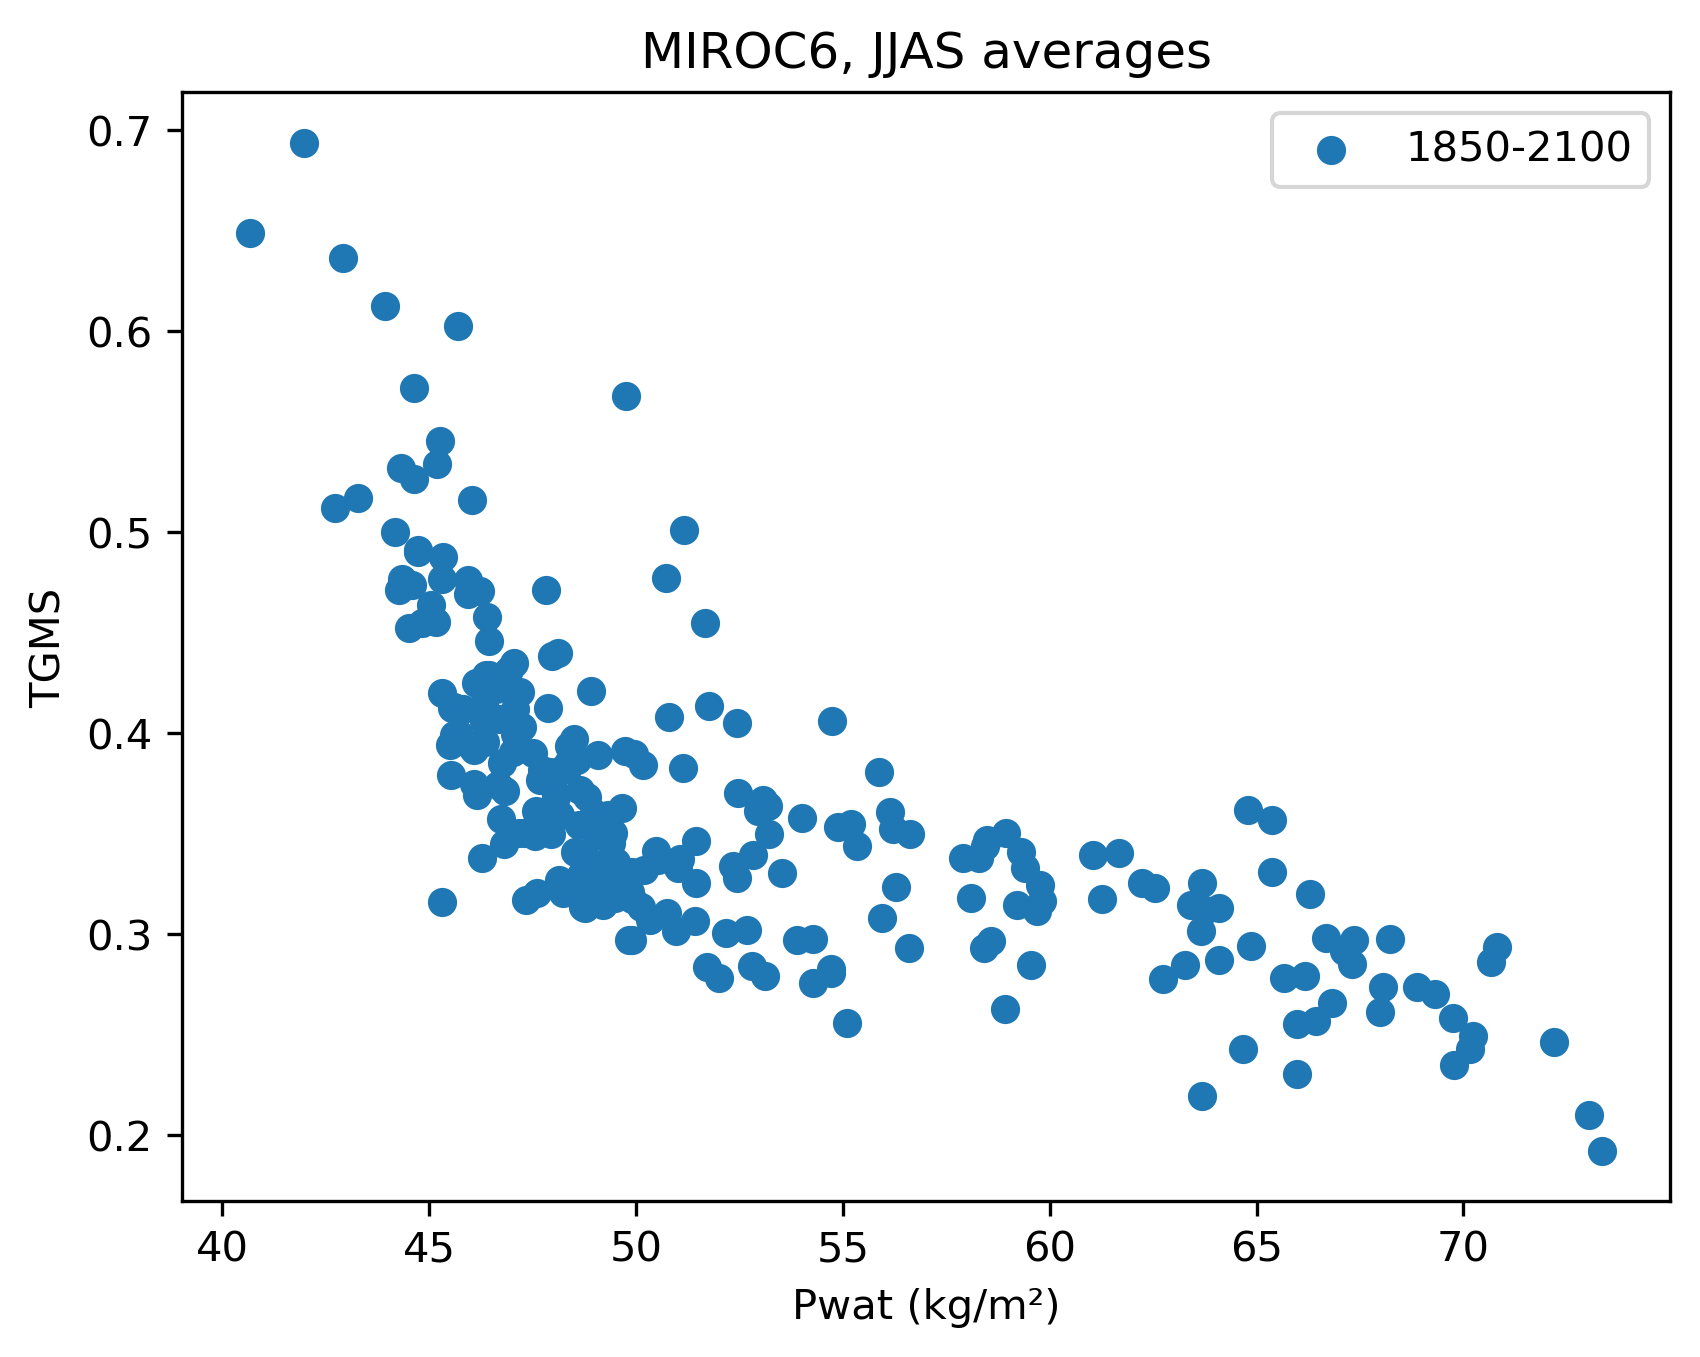

In [16]:
plt.scatter(ypwat1, TGMS1)
#plt.scatter(ypwat2, TGMS2)
#plt.scatter(ypwat3, TGMS3)
#plt.plot(x1, y_pred1, color ='k')
#plt.plot(x2, y_pred2, color ='k')
#plt.plot(x3, y_pred3, color ='k')
plt.ylabel('TGMS')
#plt.ylim(0,5)
plt.xlabel('Pwat (kg/m\u00b2)')
plt.title('MIROC6, JJAS averages')
plt.legend(['1850-2100'])

In [21]:
Pwat = np.array([42.723522, 45.52934 , 45.81441 , 44.586044, 43.941406, 47.31603 ,
        47.197968, 46.02831 , 44.73361 , 46.448334, 45.610485, 45.17481 ,
        46.393387, 45.507122, 48.241055, 47.854332, 48.88569 , 46.657043,
        45.56013 , 45.270084, 46.44484 , 48.08172 , 45.9477  , 41.98023 ,
        46.831688, 47.070194, 45.990383, 48.921032, 45.31537 , 46.32974 ,
        49.505318, 44.832657, 44.62758 , 45.042747, 45.314064, 45.313824,
        45.702755, 47.80783 , 47.993587, 43.29376 , 44.352028, 46.804996,
        46.170895, 42.9134  , 40.668343, 45.615368, 48.157032, 47.512108,
        48.80993 , 47.1652  , 44.741123, 45.329937, 47.245693, 49.91232 ,
        46.74514 , 47.980255, 48.521793, 47.736126, 47.353992, 44.326897,
        48.370003, 48.733105, 49.6649  , 47.59976 , 46.76289 , 46.75277 ,
        46.0824  , 49.907955, 48.026375, 46.083523, 44.52376 , 46.452602,
        48.767162, 48.851624, 49.89655 , 47.873295, 47.56451 , 47.084583,
        46.69456 , 49.33661 , 48.642365, 46.688816, 50.33348 , 48.941933,
        49.209812, 48.33829 , 46.621666, 48.37427 , 49.44969 , 49.863415,
        47.675117, 46.938198, 48.133583, 44.1863  , 48.616528, 49.525894,
        46.82657 , 46.127766, 44.64594 , 46.382473, 49.463875, 45.947933,
        46.372627, 49.000397, 49.845005, 46.355972, 48.57754 , 47.927917,
        48.234333, 48.67816 , 47.576817, 47.029545, 48.494446, 47.397087,
        46.34092 , 48.98651 , 51.453636, 49.084705, 49.02492 , 47.95539 ,
        45.204956, 44.2816  , 50.482967, 51.71212 , 48.861694, 48.624874,
        50.74434 , 52.19015 , 49.727085, 49.05285 , 50.17104 , 52.01164 ,
        47.06211 , 49.392776, 49.015408, 50.546627, 50.981606, 48.111584,
        48.908913, 46.221478, 47.974873, 45.700825, 46.289135, 49.189266,
        50.113316, 49.944965, 51.029102, 50.1881  , 51.42526 , 52.690826,
        51.445385, 47.837875, 49.39661 , 55.112717, 54.276245, 52.79565 ,
        54.71967 , 52.449703, 50.807594, 52.82537 , 54.28    , 52.3587  ,
        51.06476 , 51.146015, 53.10921 , 50.73155 , 53.886433, 53.210278,
        54.72231 , 53.199585, 51.775803, 53.52612 , 51.67857 , 52.443516,
        52.464592, 49.77133 , 51.15502 , 54.89387 , 52.945427, 54.005215,
        55.949127, 55.355602, 53.083244, 55.88171 , 58.407803, 56.59714 ,
        56.296463, 55.199135, 56.151737, 59.539257, 58.089684, 56.207855,
        54.751545, 59.207798, 58.571335, 58.937077, 58.2828  , 57.90181 ,
        58.918255, 59.770794, 59.29761 , 59.6972  , 58.44705 , 59.826492,
        58.47395 , 56.626743, 62.74217 , 63.65603 , 61.058712, 62.235767,
        63.264694, 61.26424 , 59.413906, 62.54553 , 64.08171 , 63.41331 ,
        61.67773 , 63.683918, 64.67742 , 65.97285 , 63.691093, 63.750362,
        64.091385, 66.446434, 64.861115, 64.787605, 66.815285, 67.10928 ,
        65.98492 , 65.37309 , 69.31683 , 65.363686, 67.31371 , 66.18041 ,
        67.98126 , 69.77078 , 68.87615 , 66.684906, 65.66848 , 70.23635 ,
        69.75716 , 68.234566, 66.293686, 67.36319 , 70.669685, 70.80553 ,
        68.052086, 73.35912 , 70.15719 , 73.02818 , 72.19862 ])
        
TGMS = np.array([0.5119791 , 0.37895712, 0.41209245, 0.47390926, 0.6124386 ,
        0.3502372 , 0.42041117, 0.5159358 , 0.49019763, 0.4290481 ,
        0.39895216, 0.4554689 , 0.45780343, 0.39391902, 0.38192797,
        0.35513514, 0.3356792 , 0.37430924, 0.41246977, 0.5453237 ,
        0.40920115, 0.36803445, 0.46922094, 0.6937273 , 0.37136355,
        0.39935428, 0.3941482 , 0.3255335 , 0.4768712 , 0.41447103,
        0.31811368, 0.4548864 , 0.52630025, 0.46364734, 0.31601813,
        0.42006275, 0.39996383, 0.35836598, 0.35657918, 0.51705015,
        0.47675344, 0.34465703, 0.36926034, 0.63622636, 0.64883244,
        0.4127179 , 0.35911873, 0.38999102, 0.3680593 , 0.3500741 ,
        0.4908916 , 0.48744628, 0.40301085, 0.29678607, 0.35727507,
        0.37424543, 0.34074947, 0.38174996, 0.31692624, 0.53172976,
        0.3851333 , 0.31368172, 0.36270738, 0.3203112 , 0.38498366,
        0.4267506 , 0.39138323, 0.3308679 , 0.35730663, 0.37476593,
        0.4523489 , 0.44597548, 0.3129438 , 0.32068324, 0.31732494,
        0.4123504 , 0.34864703, 0.41183317, 0.42363247, 0.35934284,
        0.37168047, 0.40680066, 0.3071048 , 0.33282432, 0.31419718,
        0.38185745, 0.4216842 , 0.39367566, 0.3501851 , 0.32107762,
        0.37667847, 0.4314857 , 0.32671466, 0.5002424 , 0.33956945,
        0.33590975, 0.42929065, 0.4248868 , 0.57164675, 0.42896688,
        0.32885653, 0.4761084 , 0.4075046 , 0.33439088, 0.29676542,
        0.39567497, 0.38655153, 0.3806138 , 0.32020384, 0.32924965,
        0.36096254, 0.39045864, 0.39705065, 0.35084847, 0.40543908,
        0.3603104 , 0.3253682 , 0.3892548 , 0.34948674, 0.34971204,
        0.5337906 , 0.4713832 , 0.3413902 , 0.2835764 , 0.3357918 ,
        0.35443693, 0.31043592, 0.30031997, 0.39088783, 0.35799277,
        0.38411093, 0.2783038 , 0.43502617, 0.3466929 , 0.35468477,
        0.33677042, 0.30132884, 0.43982843, 0.42100886, 0.47087446,
        0.43812004, 0.6026392 , 0.3377467 , 0.3332475 , 0.31357083,
        0.3895392 , 0.33272266, 0.3320047 , 0.3064874 , 0.3018043 ,
        0.34648764, 0.47112033, 0.3451018 , 0.25571385, 0.2753849 ,
        0.2842552 , 0.2825613 , 0.3280686 , 0.40794954, 0.3390643 ,
        0.2974774 , 0.33364868, 0.33744892, 0.38268816, 0.27919567,
        0.477259  , 0.29703516, 0.34964338, 0.28045514, 0.36359134,
        0.41340554, 0.33013052, 0.4549156 , 0.40477276, 0.37018266,
        0.56773   , 0.5008374 , 0.3533862 , 0.36142904, 0.3578831 ,
        0.30777594, 0.34378478, 0.36667058, 0.38053387, 0.29281515,
        0.2928764 , 0.3232112 , 0.35497838, 0.3607618 , 0.28477633,
        0.31787506, 0.35210693, 0.40602085, 0.3146669 , 0.29643866,
        0.35025322, 0.33779642, 0.33805114, 0.26246637, 0.3241349 ,
        0.34090862, 0.31134412, 0.3439623 , 0.31622258, 0.34692895,
        0.3497467 , 0.27741697, 0.30160043, 0.33920857, 0.3252949 ,
        0.2846328 , 0.31739333, 0.33282572, 0.32276782, 0.28713256,
        0.3143024 , 0.34049234, 0.21920887, 0.24277443, 0.25526735,
        0.3252284 , 0.31193253, 0.31290793, 0.25673229, 0.29395527,
        0.36175454, 0.26570633, 0.2914273 , 0.23055017, 0.3307381 ,
        0.27032188, 0.3567382 , 0.28510147, 0.27916613, 0.26094234,
        0.23495501, 0.27357712, 0.2978032 , 0.2783099 , 0.24922721,
        0.2579814 , 0.29756647, 0.31983778, 0.29677805, 0.28629458,
        0.29357624, 0.2734296 , 0.19213112, 0.24265118, 0.20976482,
        0.24626406], )

In [31]:
x1, y1 = Pwat, TGMS
 
def objective(x, c1, c2):
    return 1/(c1*x + c2)

p0 = [20, 1]
popt1, _ = curve_fit(objective, x1, y1, p0)

a1, b1 = popt1

print('y = %.5f / Pwat %.5f' % (a1, b1)) #ERA5


x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line1 = objective(x_line, a1, b1)


y = 0.07632 / Pwat -1.15691


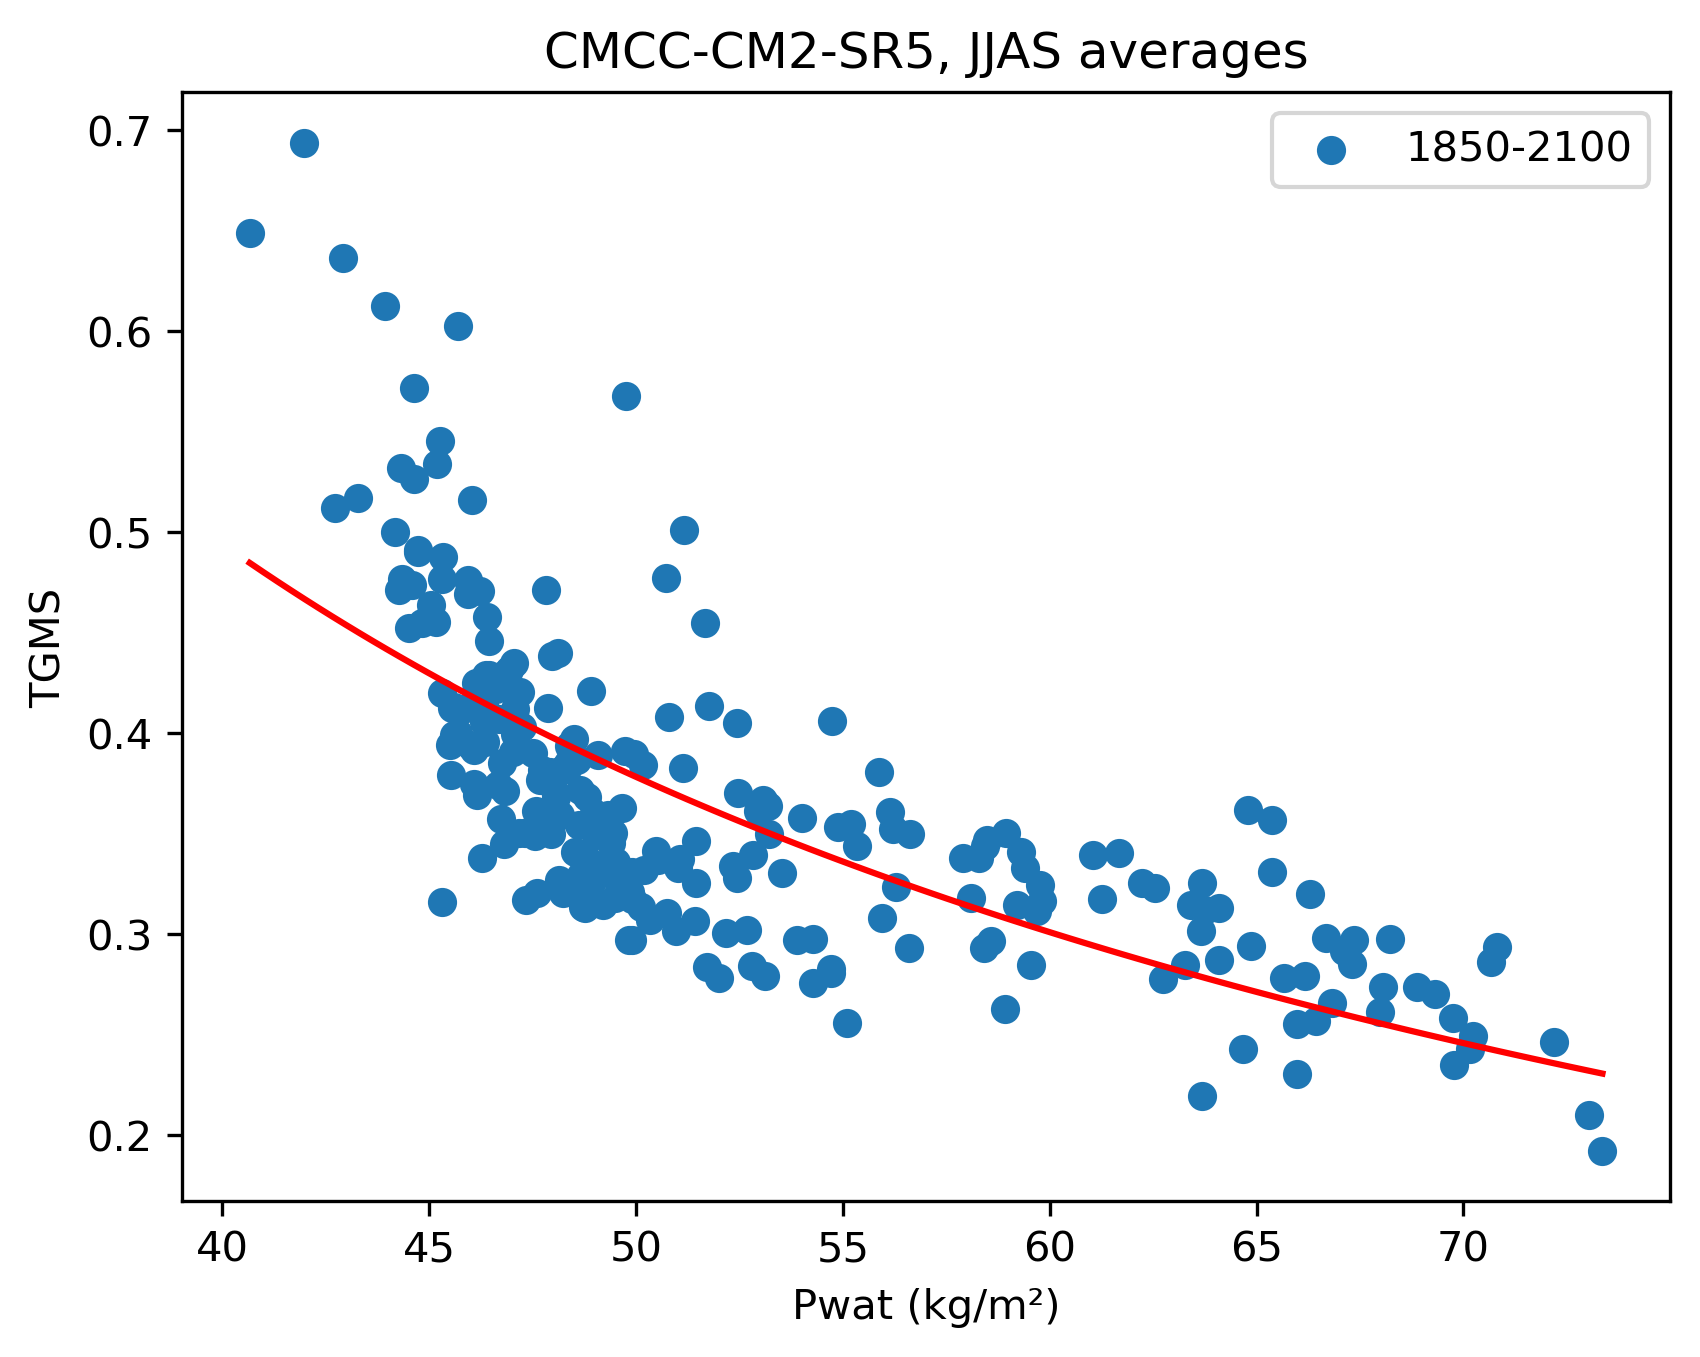

In [29]:
plt.scatter(Pwat, TGMS)
plt.plot(x_line, y_line1, color='red', label = "Best fit")
plt.ylabel('TGMS')
plt.xlabel('Pwat (kg/m\u00b2)')
plt.title('CMCC-CM2-SR5, JJAS averages')
plt.legend(['1850-2100'])

In [27]:
from sklearn.linear_model import LinearRegression

In [44]:
x1, y1 = ypwat1.values.reshape(-1, 1), TGMS1.values.reshape(-1, 1)
x2, y2 = ypwat2.values.reshape(-1, 1), TGMS2.values.reshape(-1, 1)
x3, y3 = ypwat3.values.reshape(-1, 1), TGMS3.values.reshape(-1, 1)

In [45]:
regr = LinearRegression()
  
regr.fit(x1, y1)
y_pred1 = regr.predict(x1)
print("Intercept:", regr.intercept_)
print("Coefficients:", regr.coef_)
c1 = regr.coef_[0][0]
c2 = regr.intercept_[0]

regr.fit(x2, y2)
y_pred2 = regr.predict(x2)
print("Intercept:", regr.intercept_)
print("Coefficients:", regr.coef_)
c3 = regr.coef_[0][0]
c4 = regr.intercept_[0]

regr.fit(x3, y3)
y_pred3 = regr.predict(x3)
print("Intercept:", regr.intercept_)
print("Coefficients:", regr.coef_)
c5 = regr.coef_[0][0]
c6 = regr.intercept_[0]

Intercept: [1.0778127]
Coefficients: [[-0.01412839]]
Intercept: [1.1282703]
Coefficients: [[-0.01304282]]
Intercept: [2.1903694]
Coefficients: [[-0.03376019]]


# Decadal stats

In [4]:
data=inm #select model to compare
grid1 = data.sel(lat=slice(10,30), lon=slice(70,90))

In [5]:
months = grid1.time.dt.month.isin(range(6, 10))
JJAS = grid1.sel(time=months)
#JJAS = grid1

In [6]:
lon_grid1, lat_grid1 = np.meshgrid(grid1.lon, grid1.lat)
mask1 = globe.is_land(lat_grid1, lon_grid1)

In [7]:
clim=JJAS.resample(time="10AS").mean()

In [8]:
Pwat = clim.prw.where(mask1>0).mean(dim=['lat', 'lon'])
P = 86400*28.96*((clim.pr.where(mask1>0).mean(dim=['lat', 'lon'])-clim.evspsbl.where(mask1>0).mean(dim=['lat', 'lon'])))
Qdiv = clim.rsdt.where(mask1>0).mean(dim=['lat', 'lon']) - clim.rsut.where(mask1>0).mean(dim=['lat', 'lon']) - clim.rlut.where(mask1>0).mean(dim=['lat', 'lon'])
E = 86400*28.96*(clim.evspsbl.where(mask1>0).mean(dim=['lat', 'lon']))
Pr = 86400*28.96*(clim.pr.where(mask1>0).mean(dim=['lat', 'lon']))

In [21]:
def pred(p,qnet,pwat):
    return pwat*((qnet/p)+1)

pred1 = pred(P.values, Qdiv.values, Pwat.values)

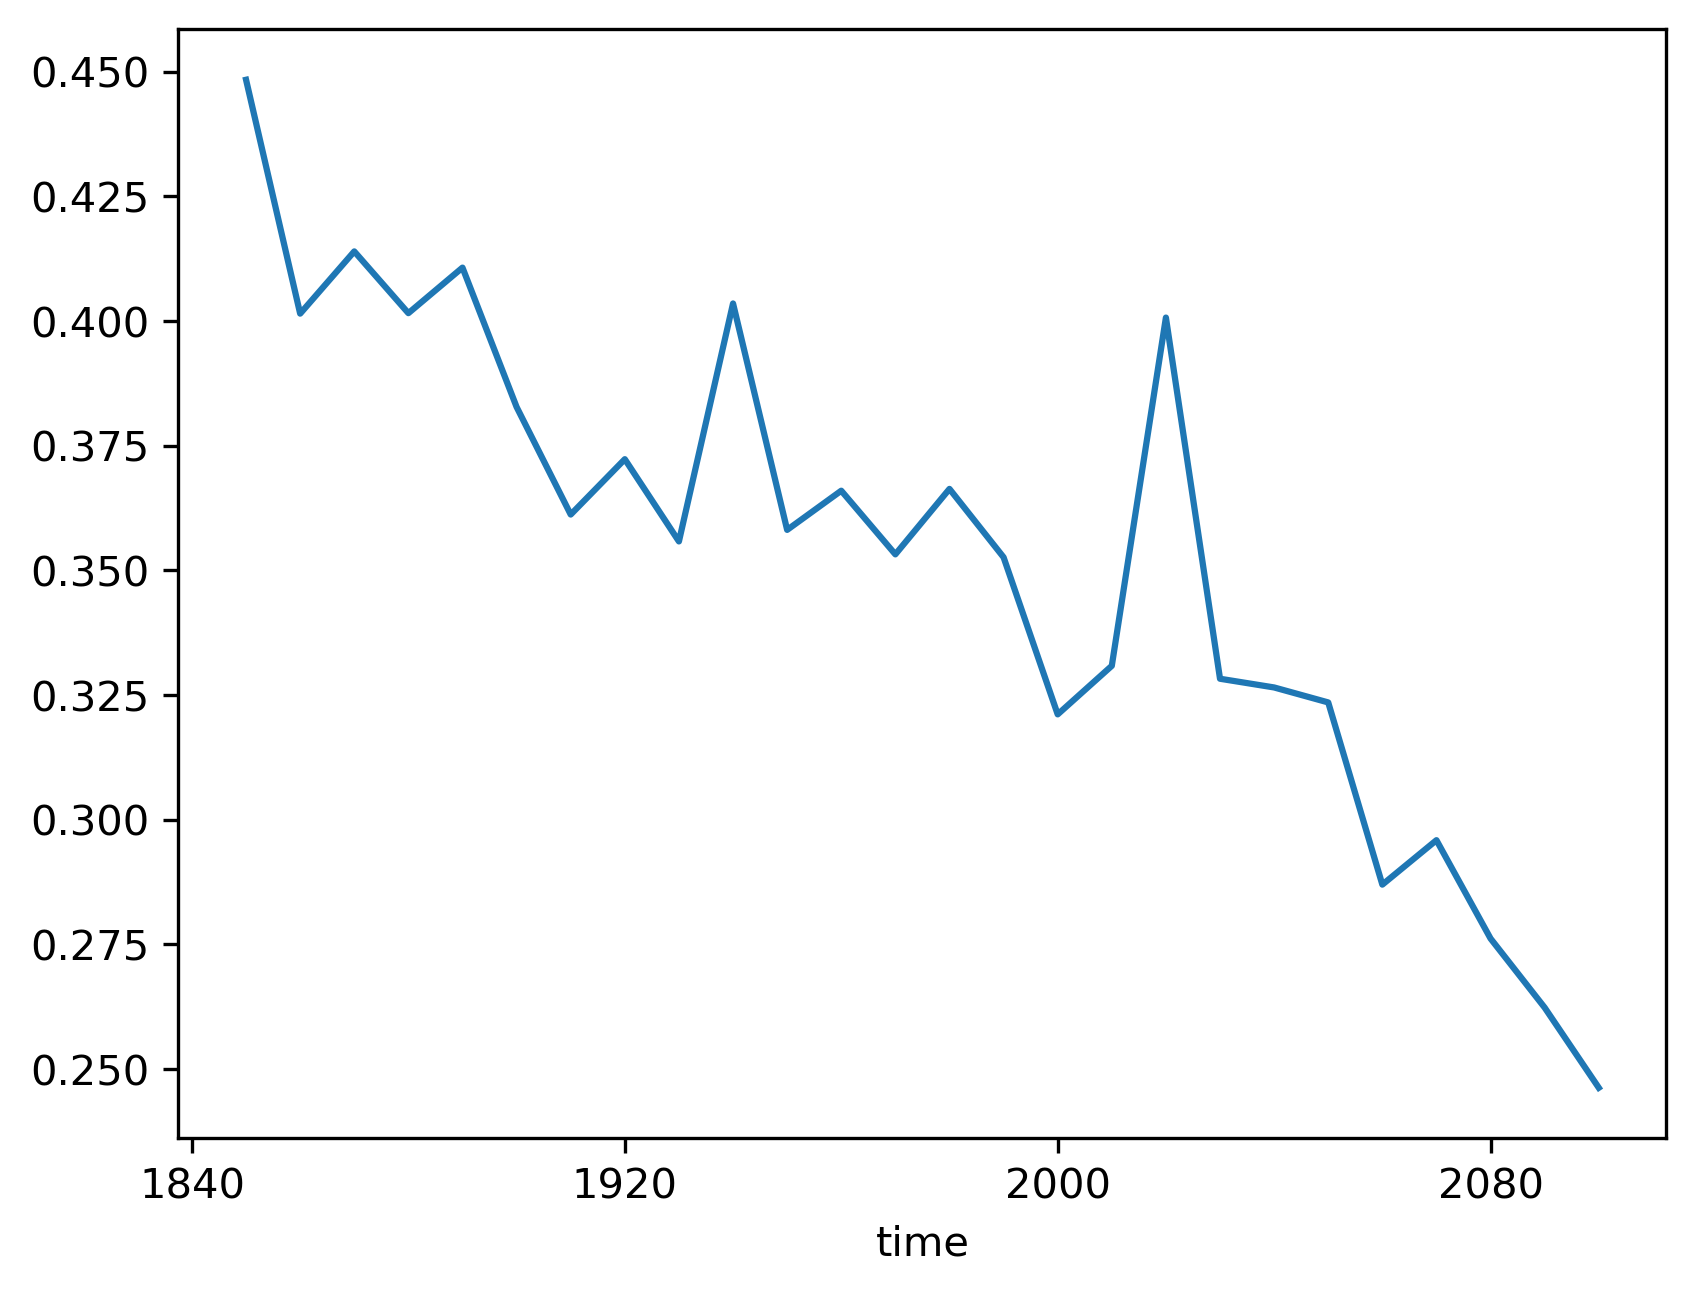

In [54]:
TGMS = np.divide(Qdiv, P)
TGMS.plot()

In [10]:
X = np.arange(1850, 2110, 10)

In [2]:
Pwat  = np.array([45.431896, 46.51542 , 46.29129 , 45.94341 , 45.816933, 46.989326,
       47.798367, 47.704525, 48.64637 , 46.905838, 48.04038 , 48.334396,
       49.08826 , 49.24232 , 49.454567, 52.16668 , 52.77088 , 52.465946,
       56.246128, 58.063892, 60.206173, 62.999535, 65.29105 , 67.73926 ,
       69.77204 , 72.19862 ])

In [25]:
Qdiv = np.array([48.560425, 51.10617 , 49.09149 , 49.877716, 49.649155, 50.784683,
       50.340546, 48.38704 , 50.06566 , 50.4478  , 49.36322 , 49.530853,
       49.928345, 47.68431 , 47.381317, 47.438065, 45.72316 , 47.826447,
       50.222534, 51.01451 , 50.92769 , 48.409744, 50.31717 , 50.363083,
       49.668182, 49.024292])

Text(0.5, 1.0, '  ')

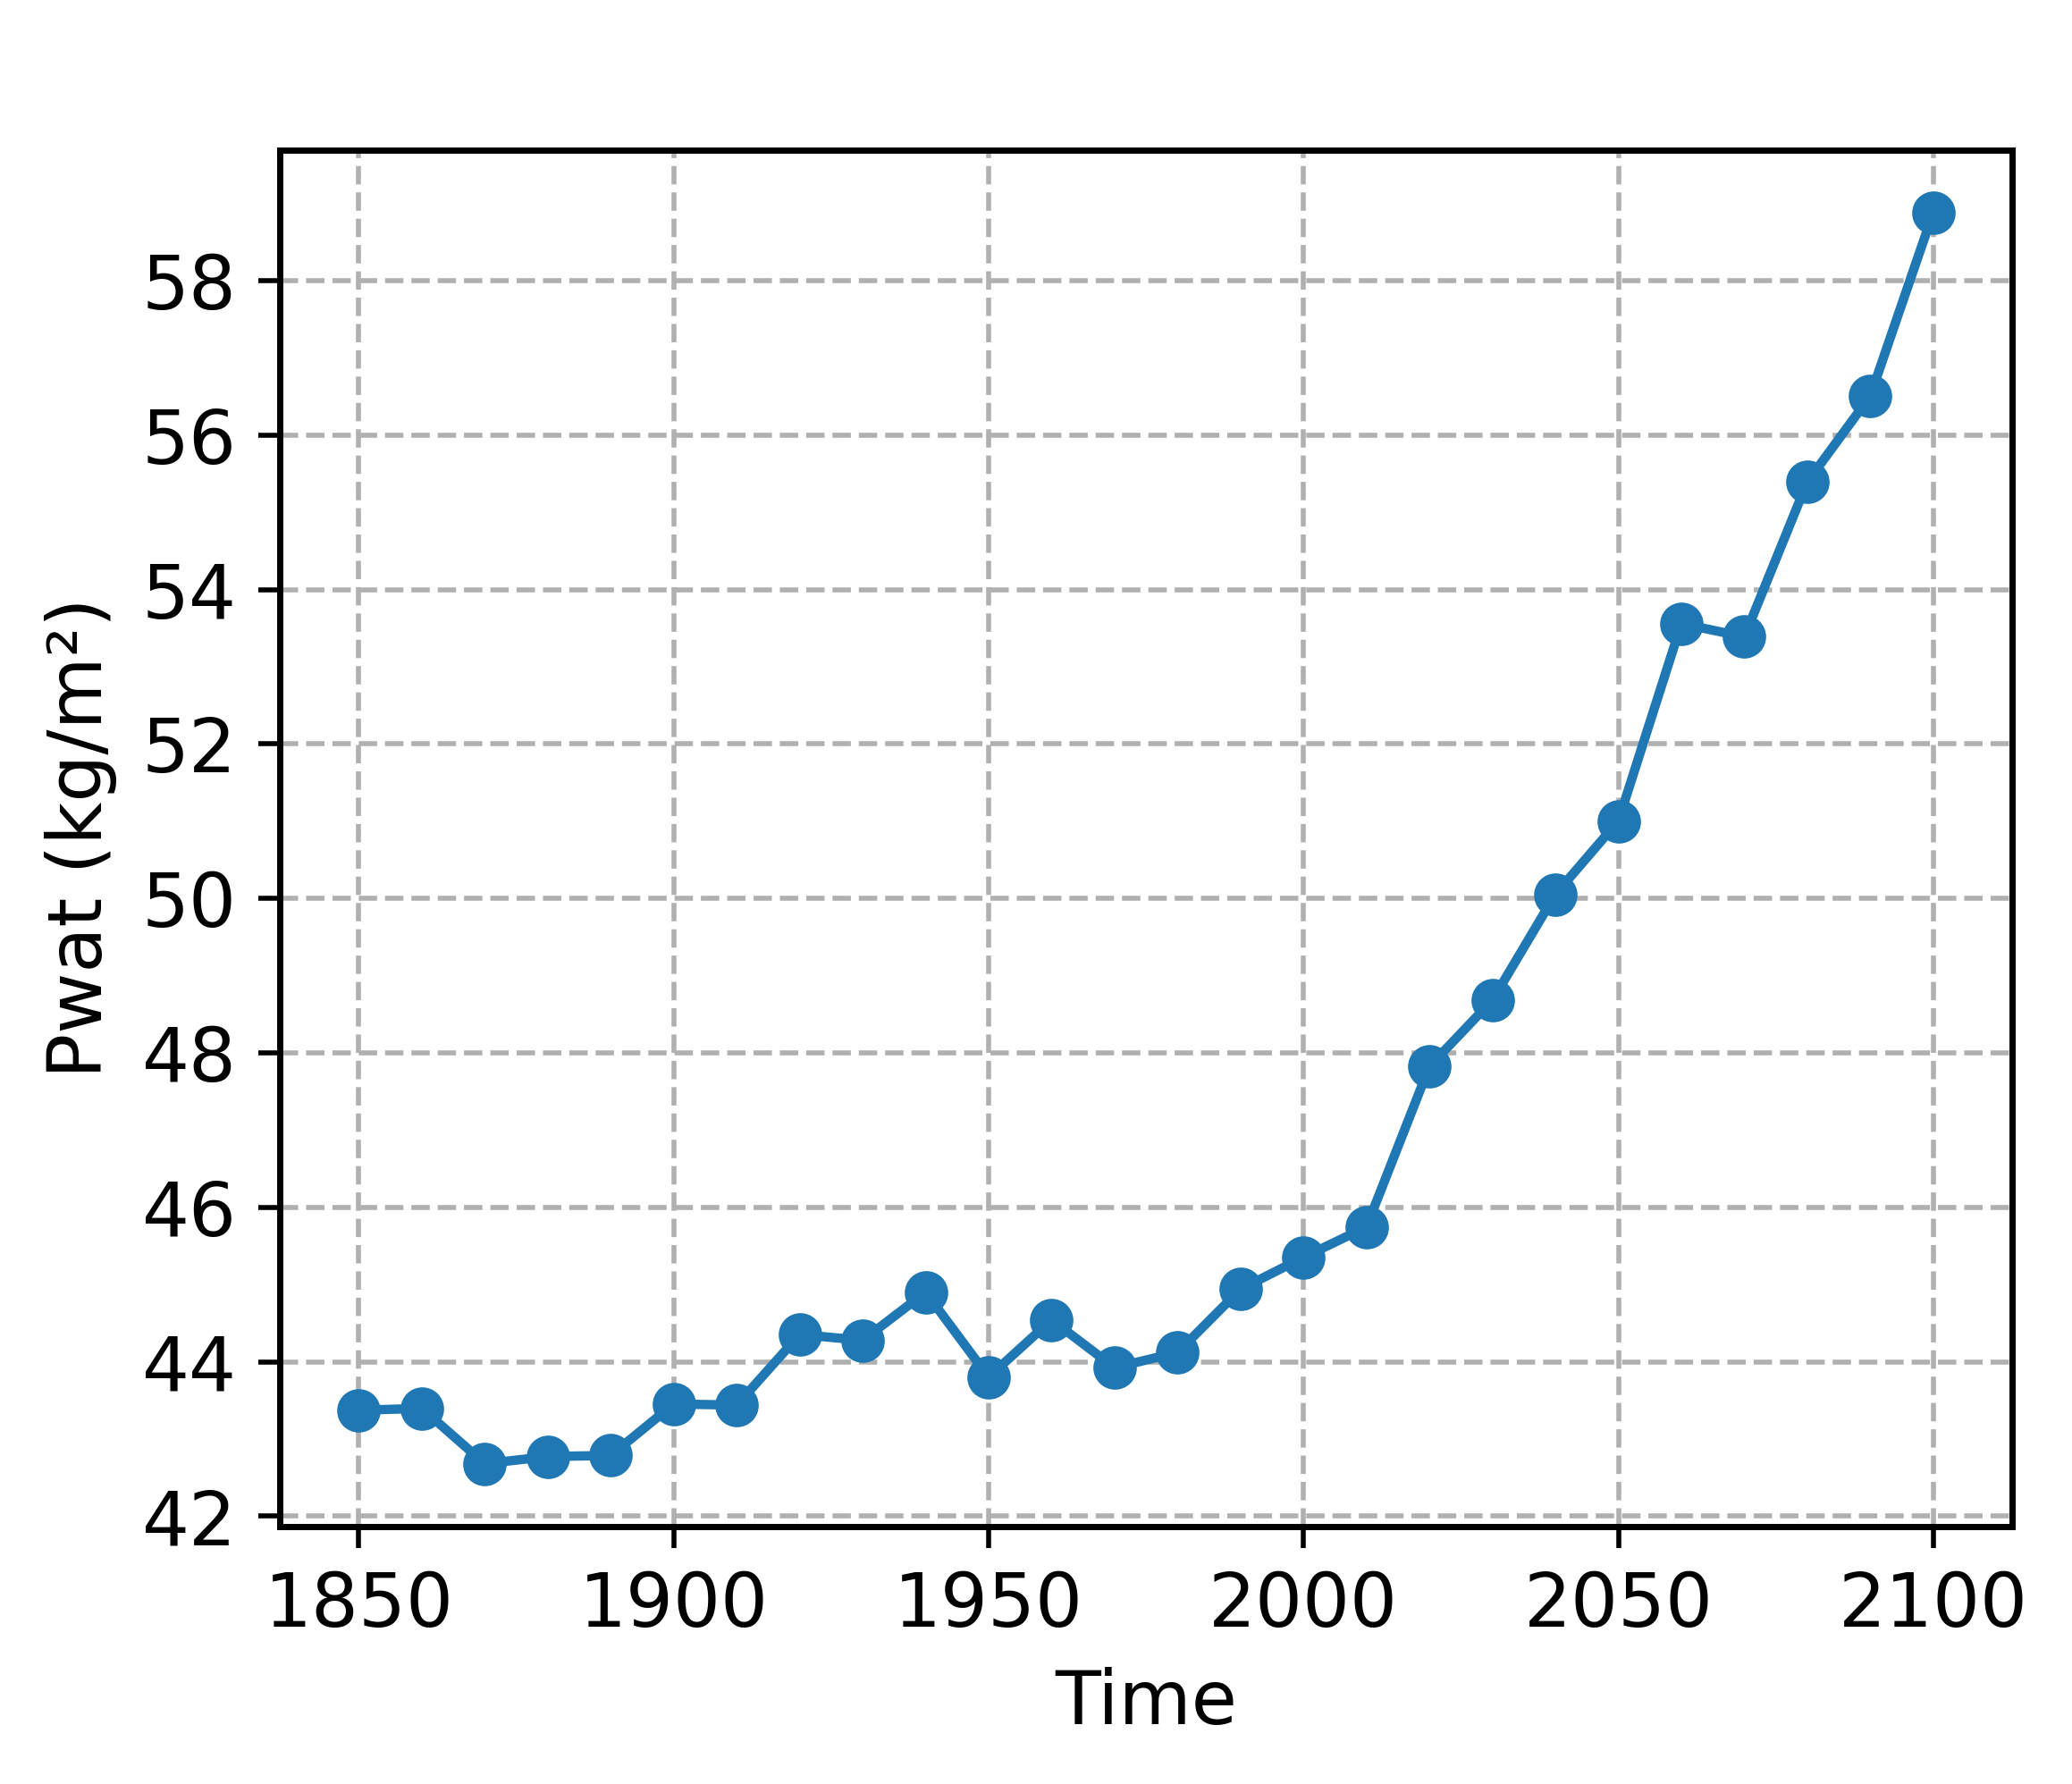

In [13]:
plt.plot(X, Pwat, marker='o')
plt.ylabel('Pwat (kg/m\u00b2)')
plt.xlabel('Time')
plt.grid(linestyle='--')
plt.title('  ')

Text(0.5, 1.0, 'Model: CMCC-CM2-SR5, JJAS average')

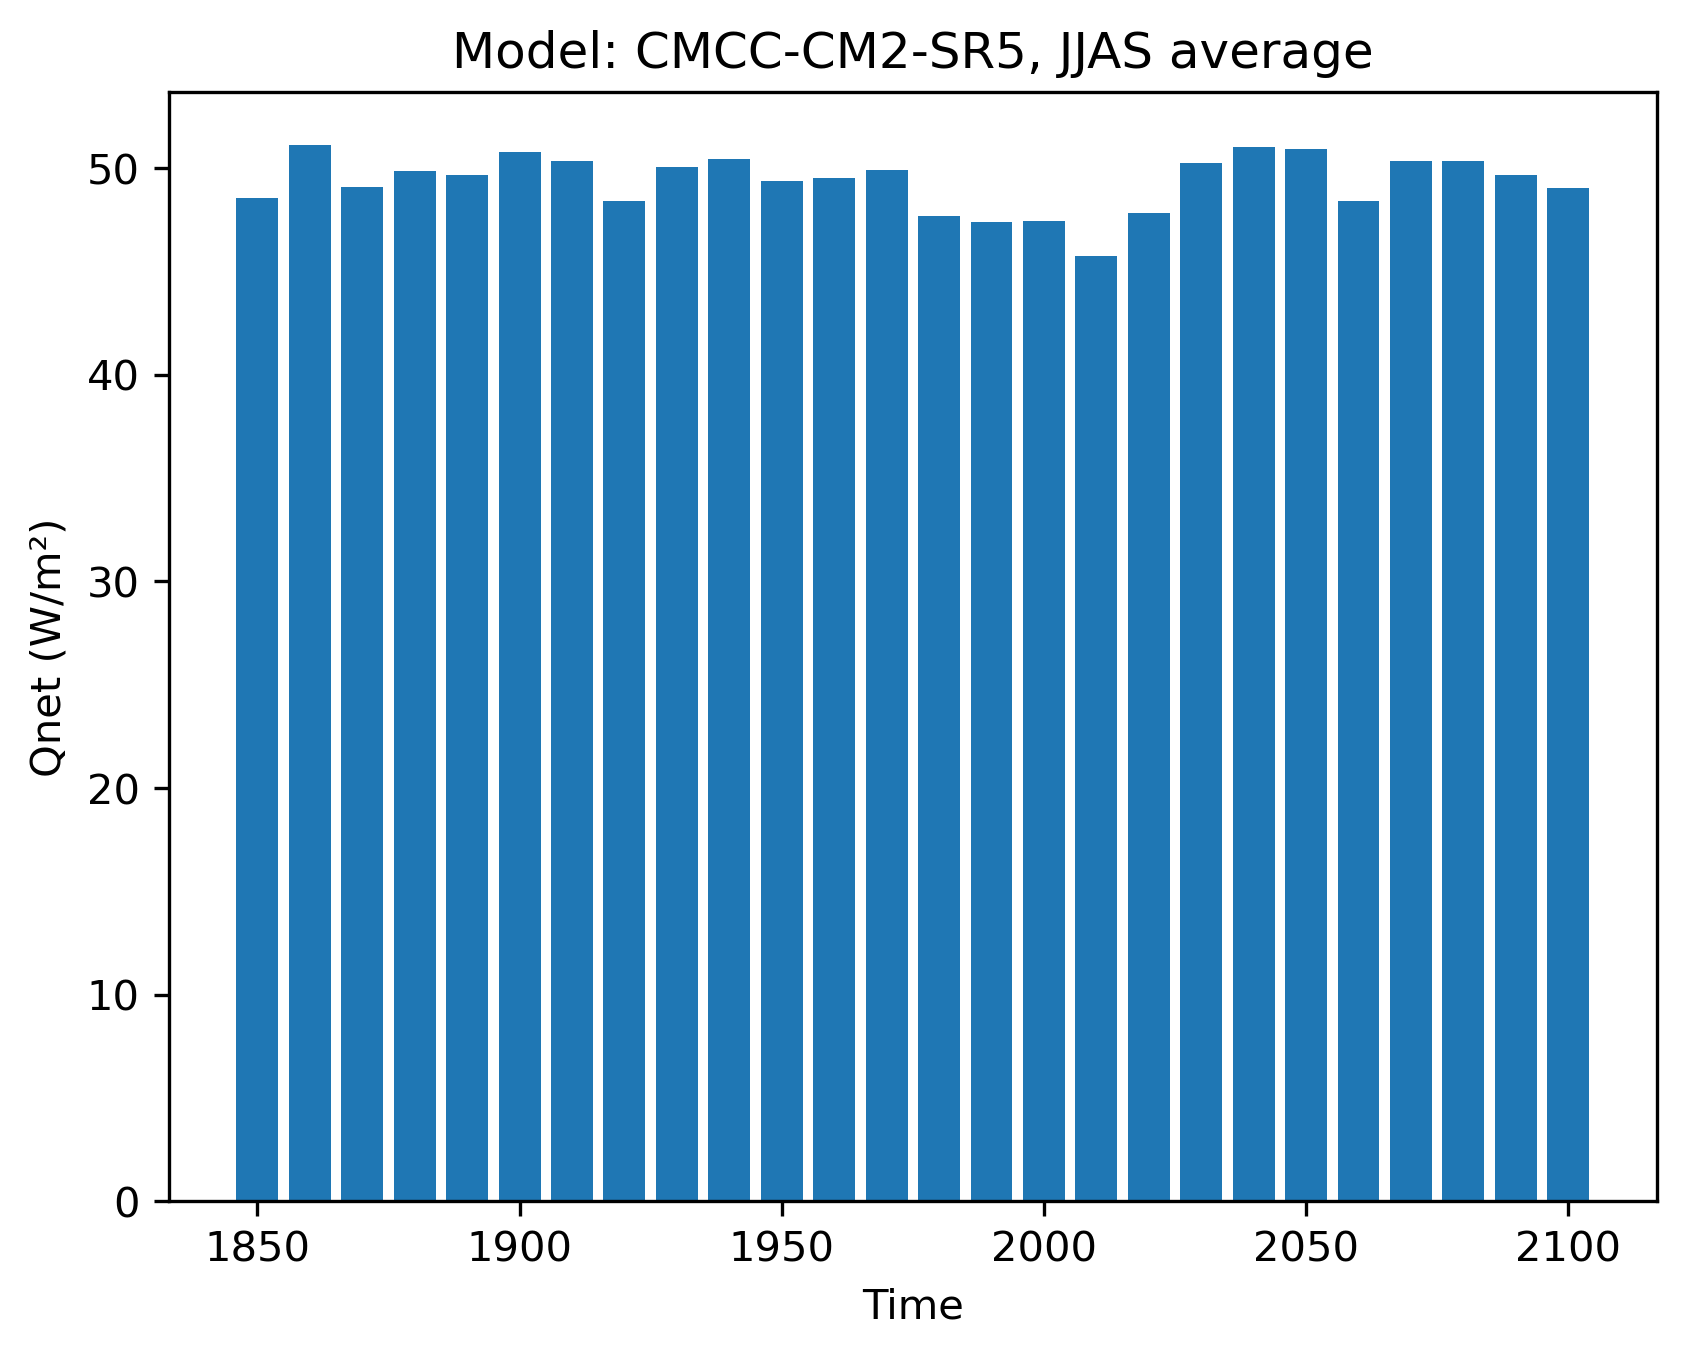

In [36]:
plt.bar(X, Qdiv, width=8)
plt.ylabel('Qnet (W/m\u00b2)')
plt.xlabel('Time')
plt.title('Model: CMCC-CM2-SR5, JJAS average')

In [31]:
E = np.array([2.5803304, 2.7895136, 2.6787107, 2.7653806, 2.6436229, 2.833165 ,
       2.8635101, 2.7510574, 2.875274 , 2.7035835, 2.7639432, 2.7895057,
       2.902604 , 2.7804565, 2.724681 , 2.8742554, 2.809494 , 2.6675868,
       2.8979843, 2.9723766, 3.0688071, 2.9861622, 3.1501808, 3.1053157,
       3.1480396, 2.9480355])

Text(0.5, 1.0, 'Model: CMCC-CM2-SR5, JJAS average')

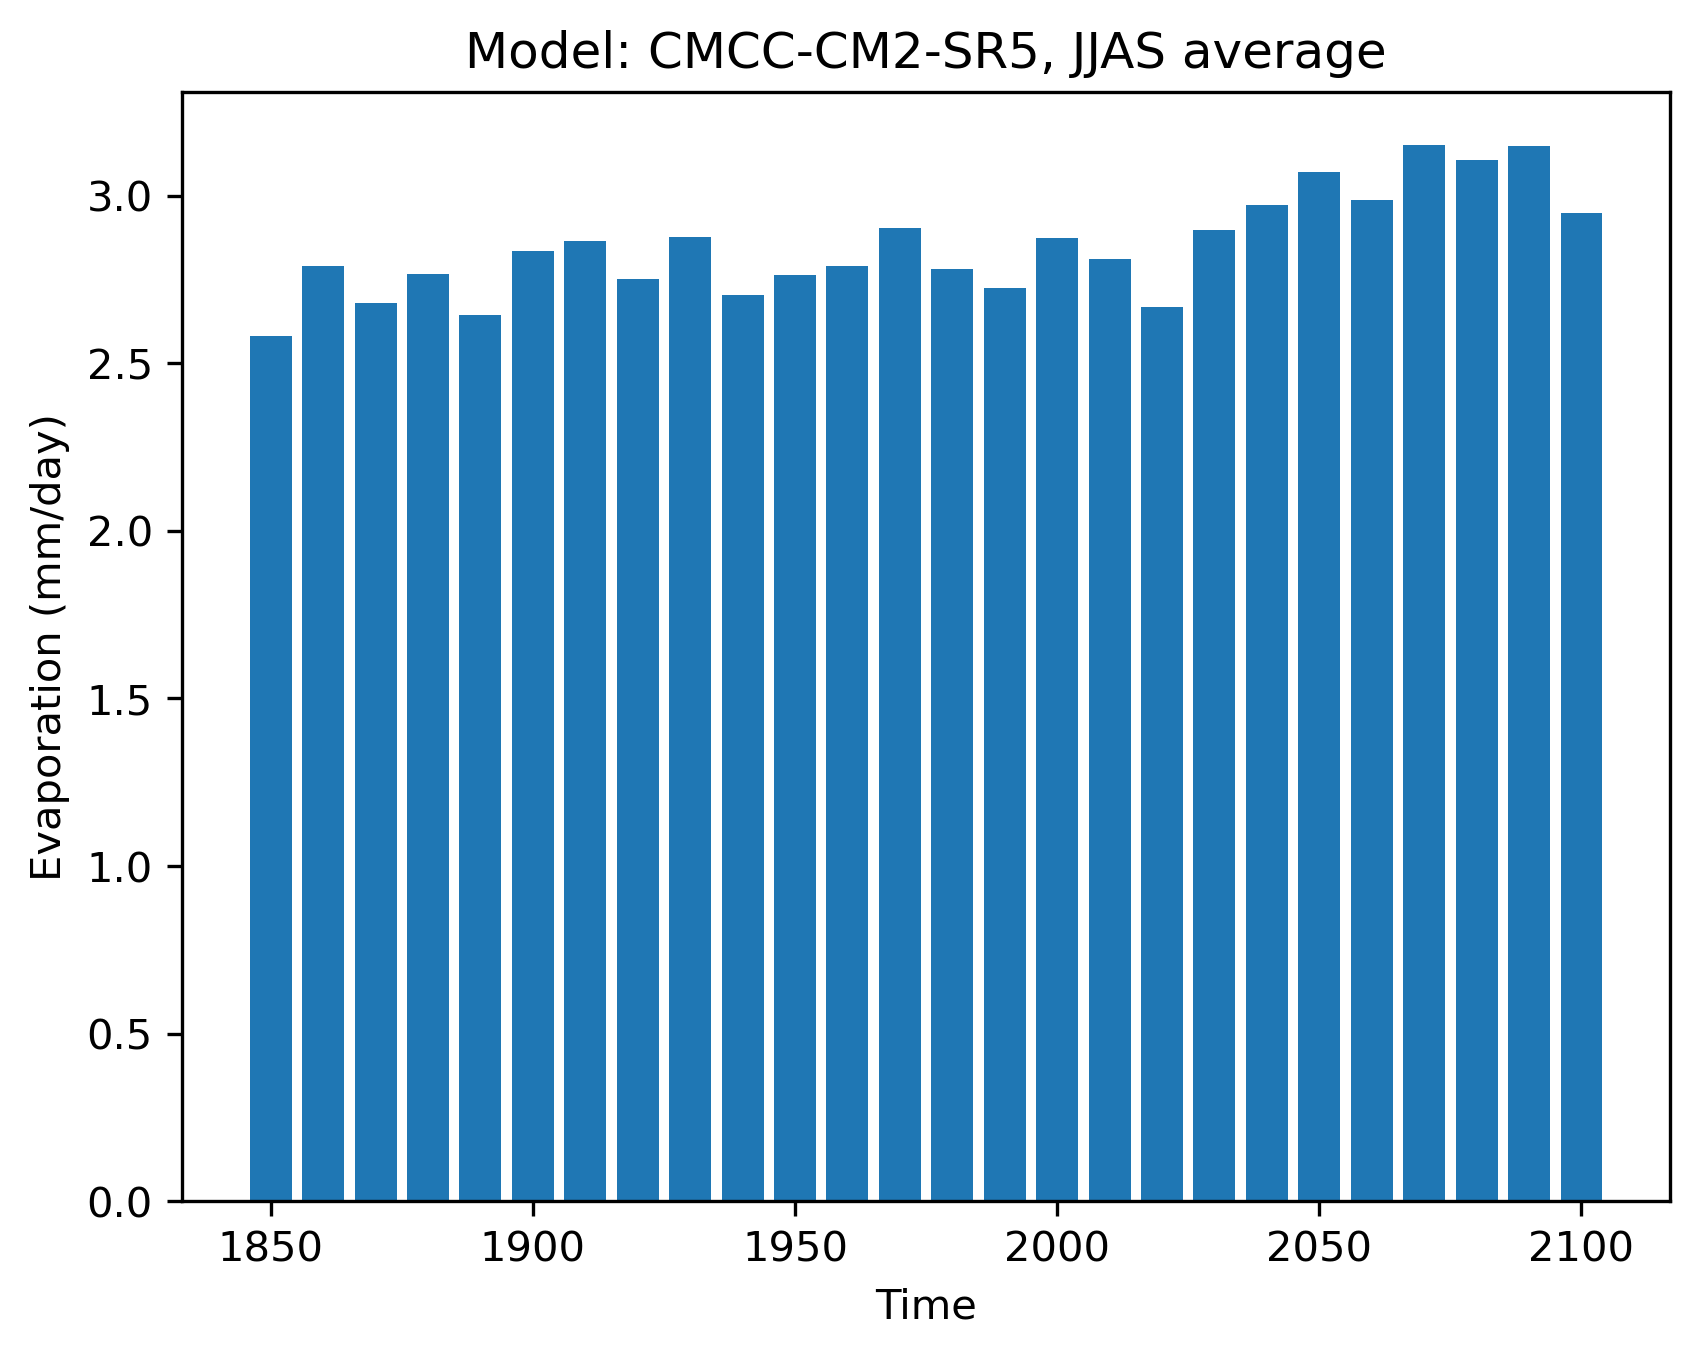

In [37]:
plt.bar(X, E, width=8)
plt.ylabel('Evaporation (mm/day)')
plt.xlabel('Time')
plt.title('Model: CMCC-CM2-SR5, JJAS average')

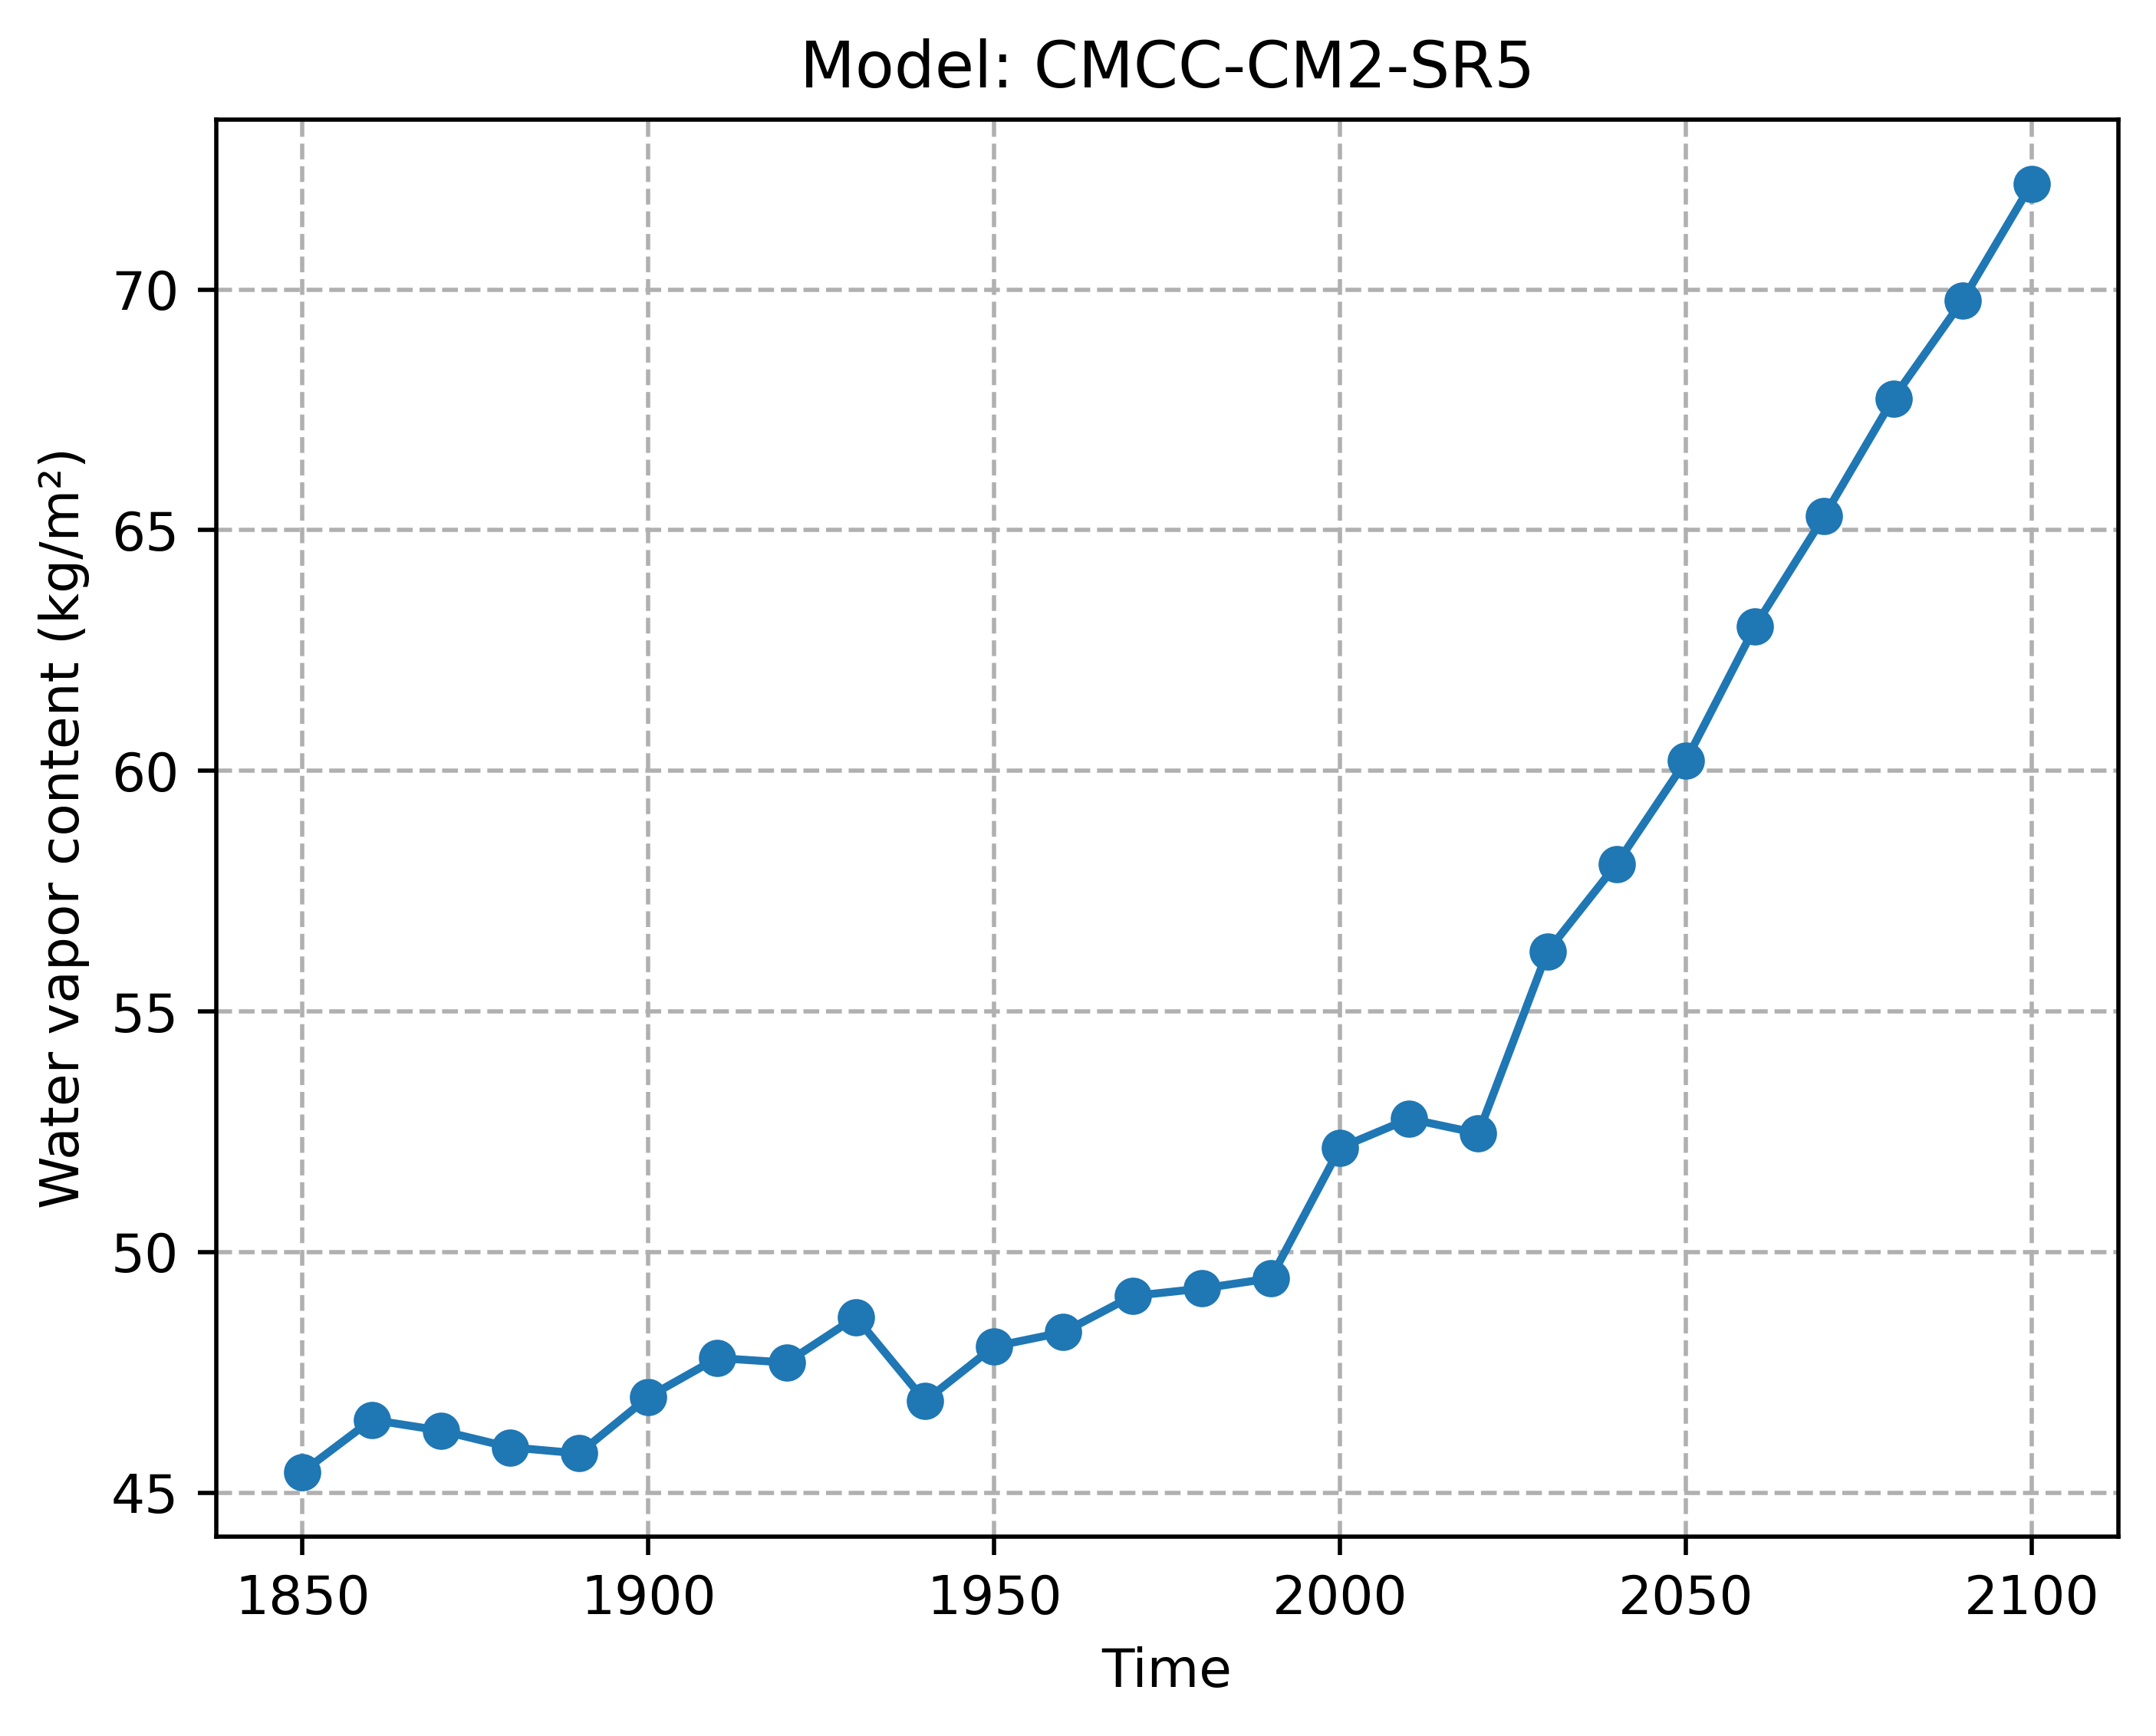

In [9]:
plt.plot(X, Pwat, marker='o')
plt.ylabel('Water vapor content (kg/m\u00b2)')
plt.xlabel('Time')
plt.title('Model: CMCC-CM2-SR5')
plt.grid(linestyle='--')

In [14]:
X = np.arange(1840, 2100, 10)

Text(0.4, 0.75, 'c = Pwat*(Qdiv/(P-E))+1')

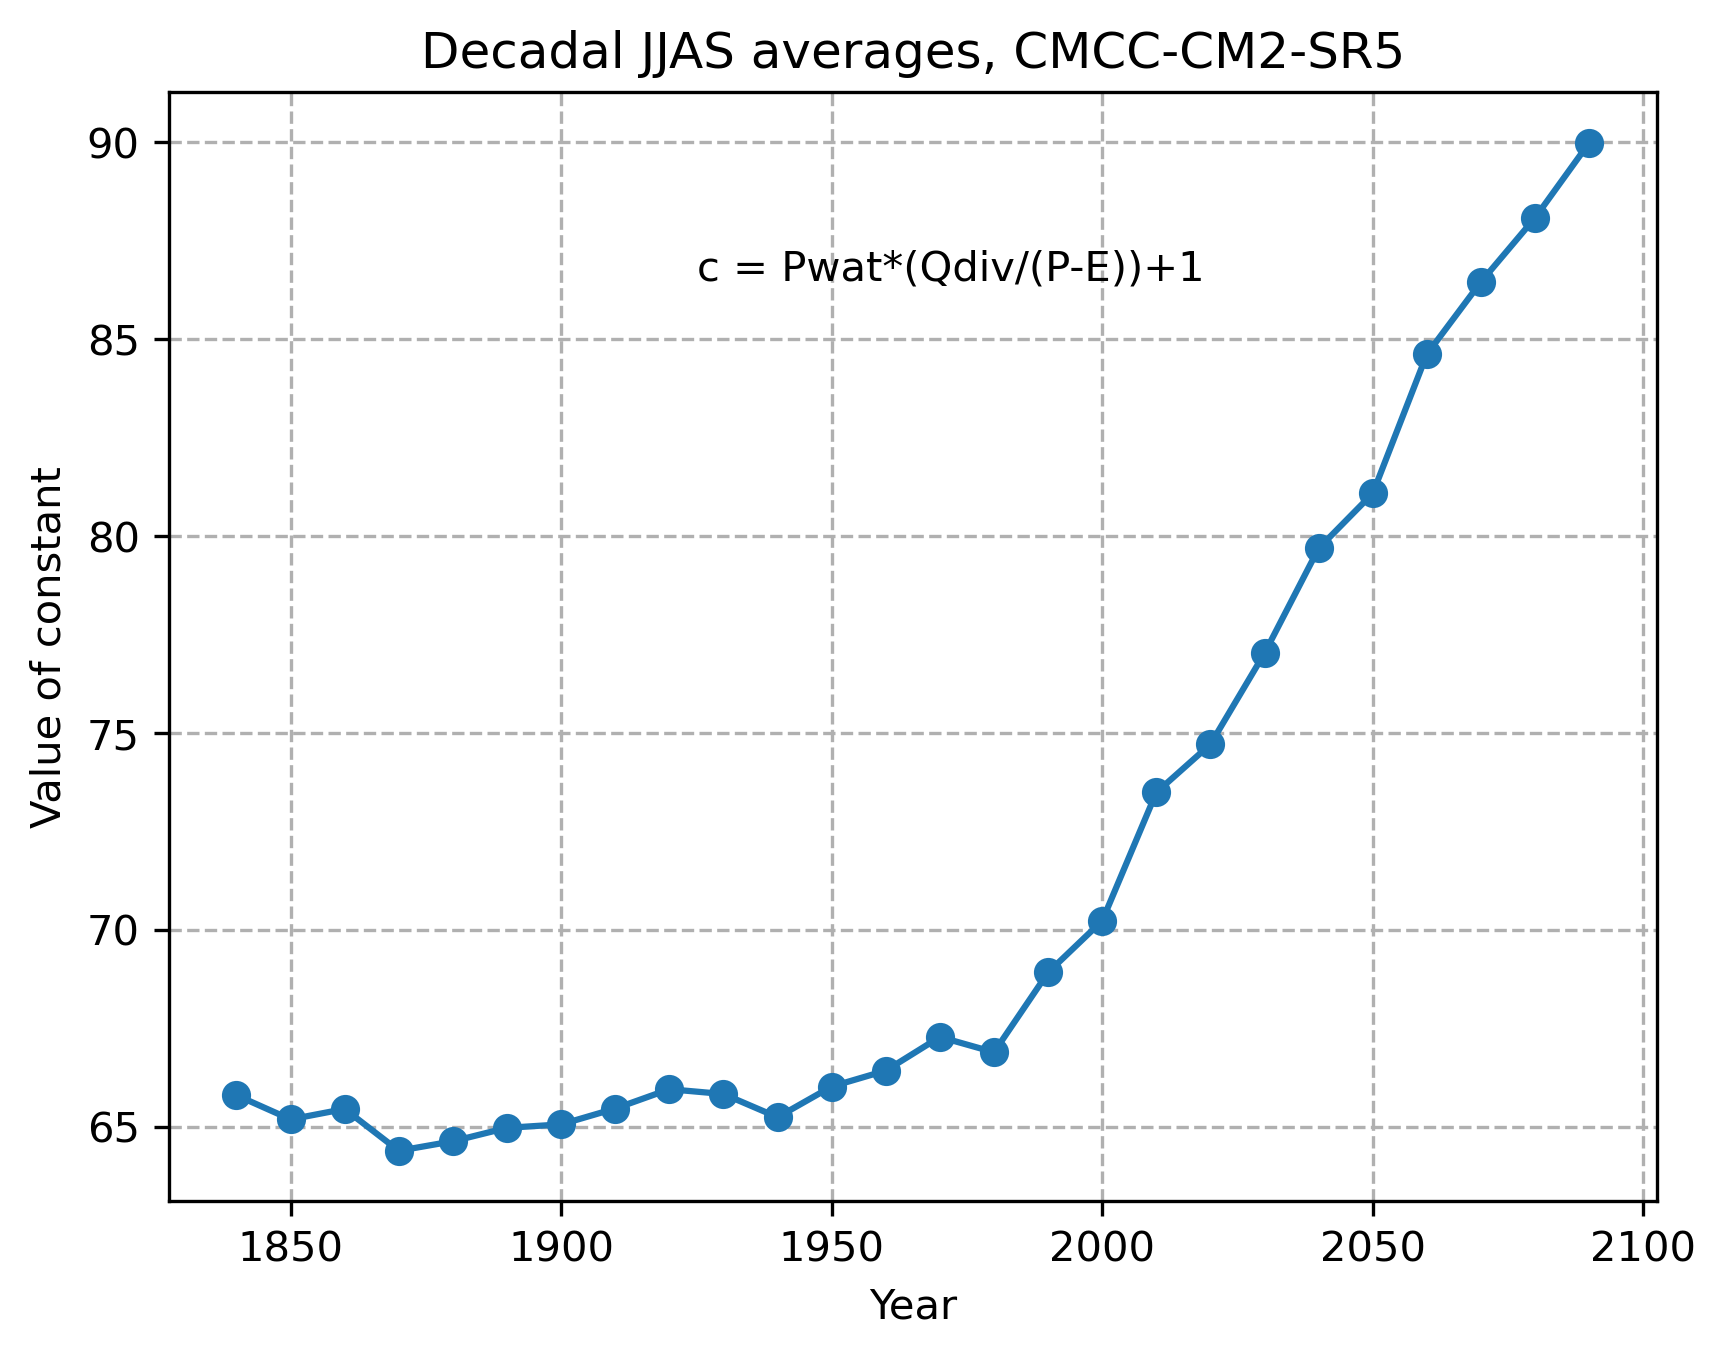

In [22]:
plt.plot(X, pred1, marker='o')
plt.ylabel('Value of constant')
plt.xlabel('Year')
plt.title('Decadal JJAS averages, CMCC-CM2-SR5')
plt.grid(linestyle='--')
plt.figtext(0.4, 0.75, 'c = Pwat*(Qdiv/(P-E))+1')

In [45]:
past = clim.sel(time=slice('1850', '2010'))
#past = clim.sel(time=slice('2020', '2100'))
nPwat = past.prw.where(mask1>0).mean(dim=['lat', 'lon'])
nP = 86400*28.96*((past.pr.where(mask1>0).mean(dim=['lat', 'lon'])-past.evspsbl.where(mask1>0).mean(dim=['lat', 'lon'])))
nQdiv = past.rsdt.where(mask1>0).mean(dim=['lat', 'lon']) - past.rsut.where(mask1>0).mean(dim=['lat', 'lon']) - past.rlut.where(mask1>0).mean(dim=['lat', 'lon'])
#E = 86400*28.96*(clim.evspsbl.where(mask1>0).mean(dim=['lat', 'lon']))

nTGMS = np.divide(nQdiv, nP)

# Relative contributions

In [46]:
Pint = nP.values
Qint = nQdiv.values
Gint = nTGMS.values

print(np.max(Pint), np.argmax(Pint))
print(np.min(Pint), np.argmin(Pint))


Q = np.average(Qint)
P = np.average(Pint)
G = Q/P

#yearly contribution
dQ = []
dG = []
for i in range(len(Pint)):
	dQ.append(Qint[i]-Q)
	dG.append(Gint[i]-G)


dP = []
Qcont = []
Tcont = []
for i in range(len(Pint)):
	Qcont.append((dQ[i]*Pint[i]/Q)/(1+(dG[i]/G)))
	Tcont.append((-dG[i]*Pint[i]/G)/(1+(dG[i]/G)))
	dP.append(Pint[i]-P)
	

sum = np.add(Tcont, Qcont).tolist()

177.18918 15
146.00989 0


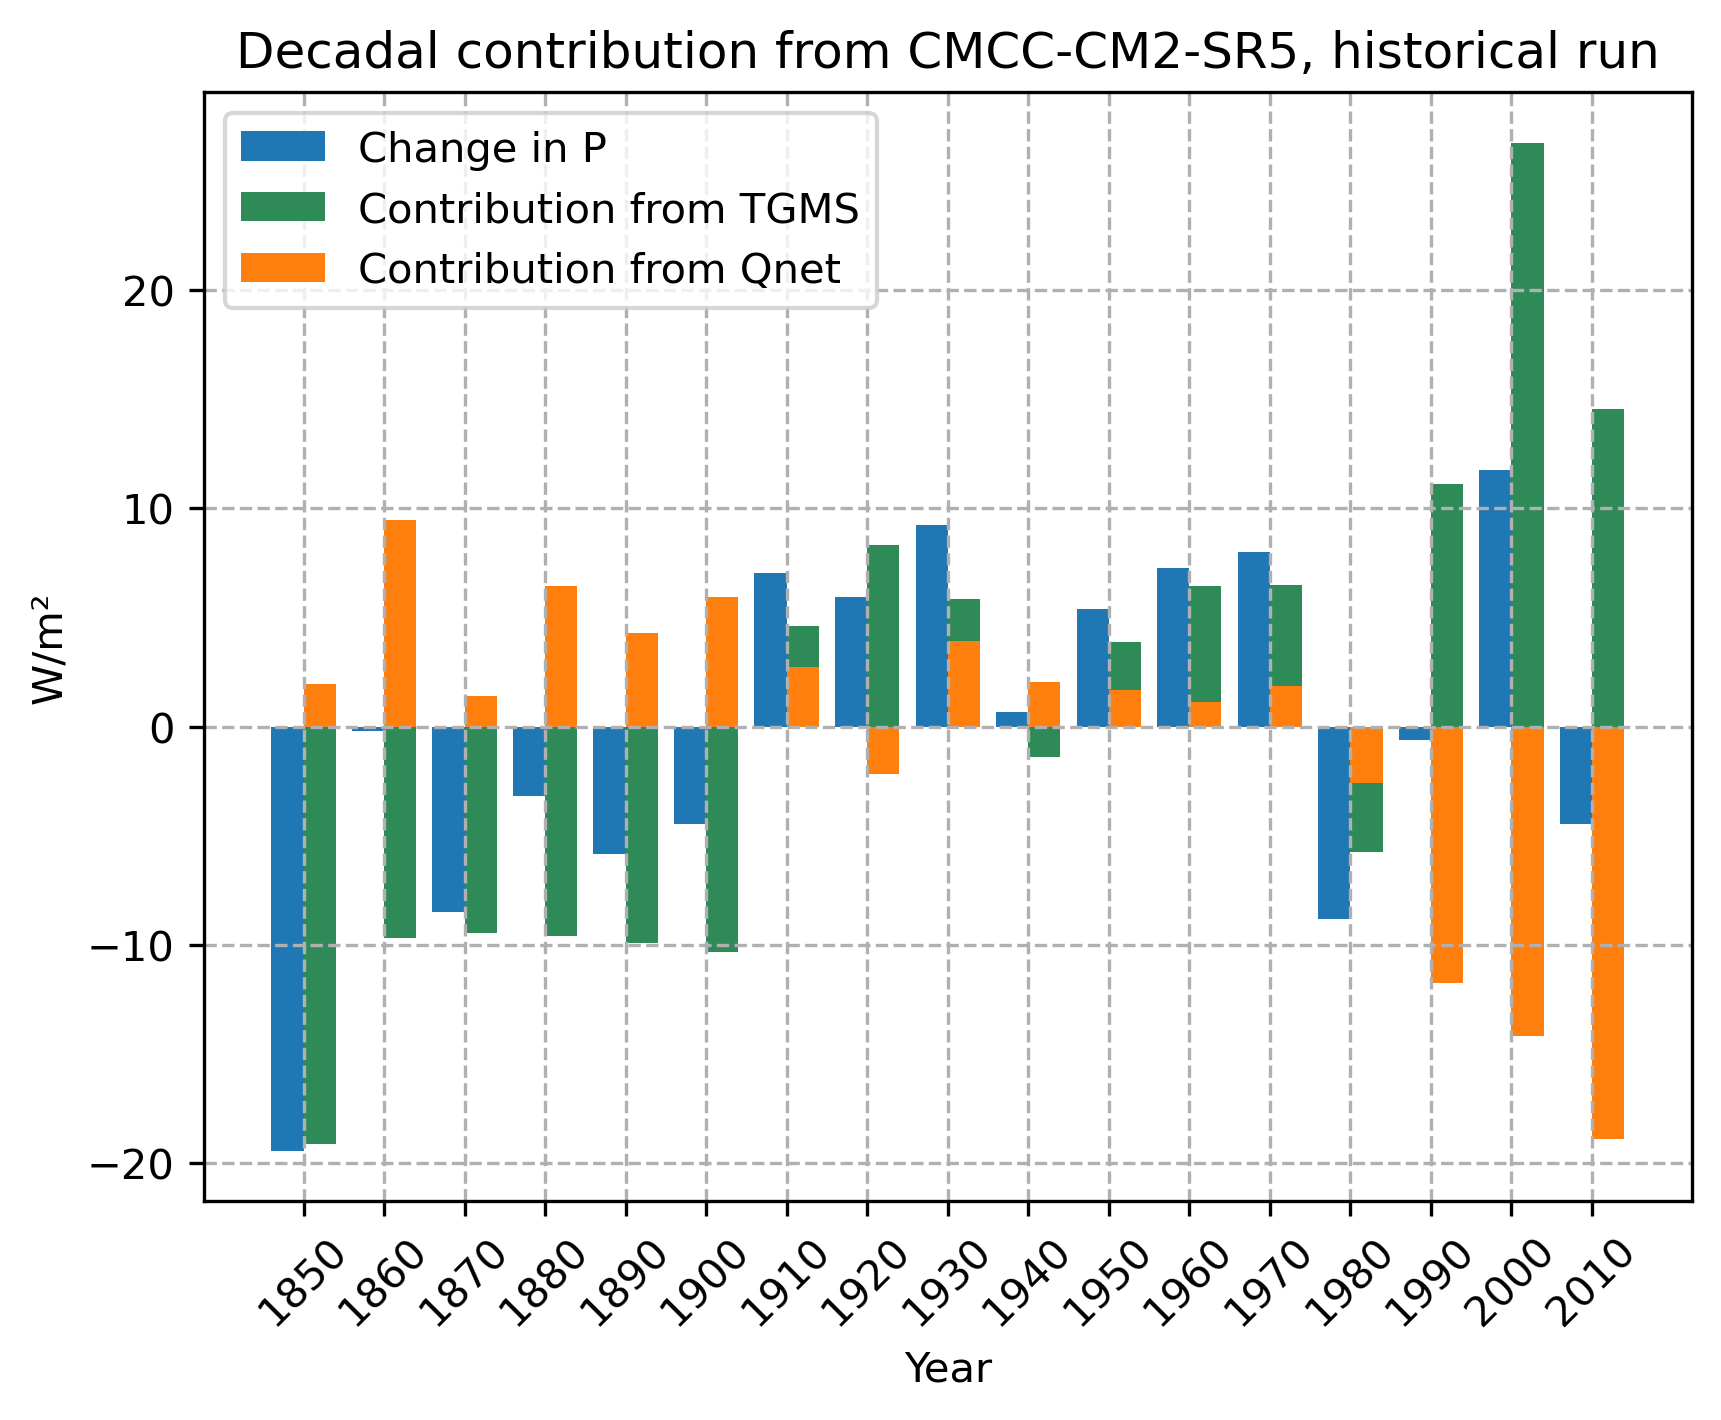

In [47]:
X = np.linspace(1850, 2010, 17, dtype='int')
#X = np.linspace(2020, 2100, 9, dtype='int')
arr = np.array(dP)
ind = X # the x locations for the groups
width = 4      # the width of the bars

plt.bar(ind-width/2, dP, width)
plt.bar(ind+width/2, Tcont, width, color='seagreen')
plt.bar(ind+width/2, Qcont, width, color='tab:orange')
plt.xticks(X, X, rotation=45)        #shows all the x labels
plt.xlabel('Year')
plt.ylabel('W/m\u00b2')
plt.title('Decadal contribution from CMCC-CM2-SR5, historical run')
plt.legend(['Change in P', 'Contribution from TGMS', 'Contribution from Qnet']) 
plt.grid(linestyle='--')
plt.show()

# VMS

In [2]:
a = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC/MSE/*'
ds1 = xr.open_mfdataset(a)

In [3]:
grid1 = ds1.sel(lat=slice(10,30), lon=slice(70,90))
lon_grid1, lat_grid1 = np.meshgrid(grid1.lon, grid1.lat)
mask1 = globe.is_land(lat_grid1, lon_grid1)

jjas = grid1.time.dt.month.isin(range(6, 10)) #JJAS
clim = grid1.sel(time=jjas)
clim = clim.groupby('time.year').mean('time')

In [5]:
clim1 = clim.sel(year=slice(1990, 2010))
clim2 = clim.sel(year=slice(2070, 2090))

In [13]:
T1 = clim1.ta
T2 = clim2.ta
q1 = clim1.hus
q2 = clim2.hus
z1 = clim1.zg
z2 = clim2.zg

In [14]:
g = 9.80616 #Avg. gravity acceleration on Earth
Cp = 1004.64 #Specific heat at constant pressure for dry air
Lv = 2.501e6 #Latent heat of vaporization for liquid water at 0C
M1 = Cp*T1+Lv*q1 + z1*g
M2 = Cp*T2+Lv*q2 + z2*g

m1 = M1.sel(plev=20000)
m2 = M1.sel(plev=85000)
VMS1=m1-m2

m3 = M2.sel(plev=20000)
m4 = M2.sel(plev=85000)
VMS2=m3-m4

In [16]:
VMS=VMS2-VMS1

KeyboardInterrupt: 

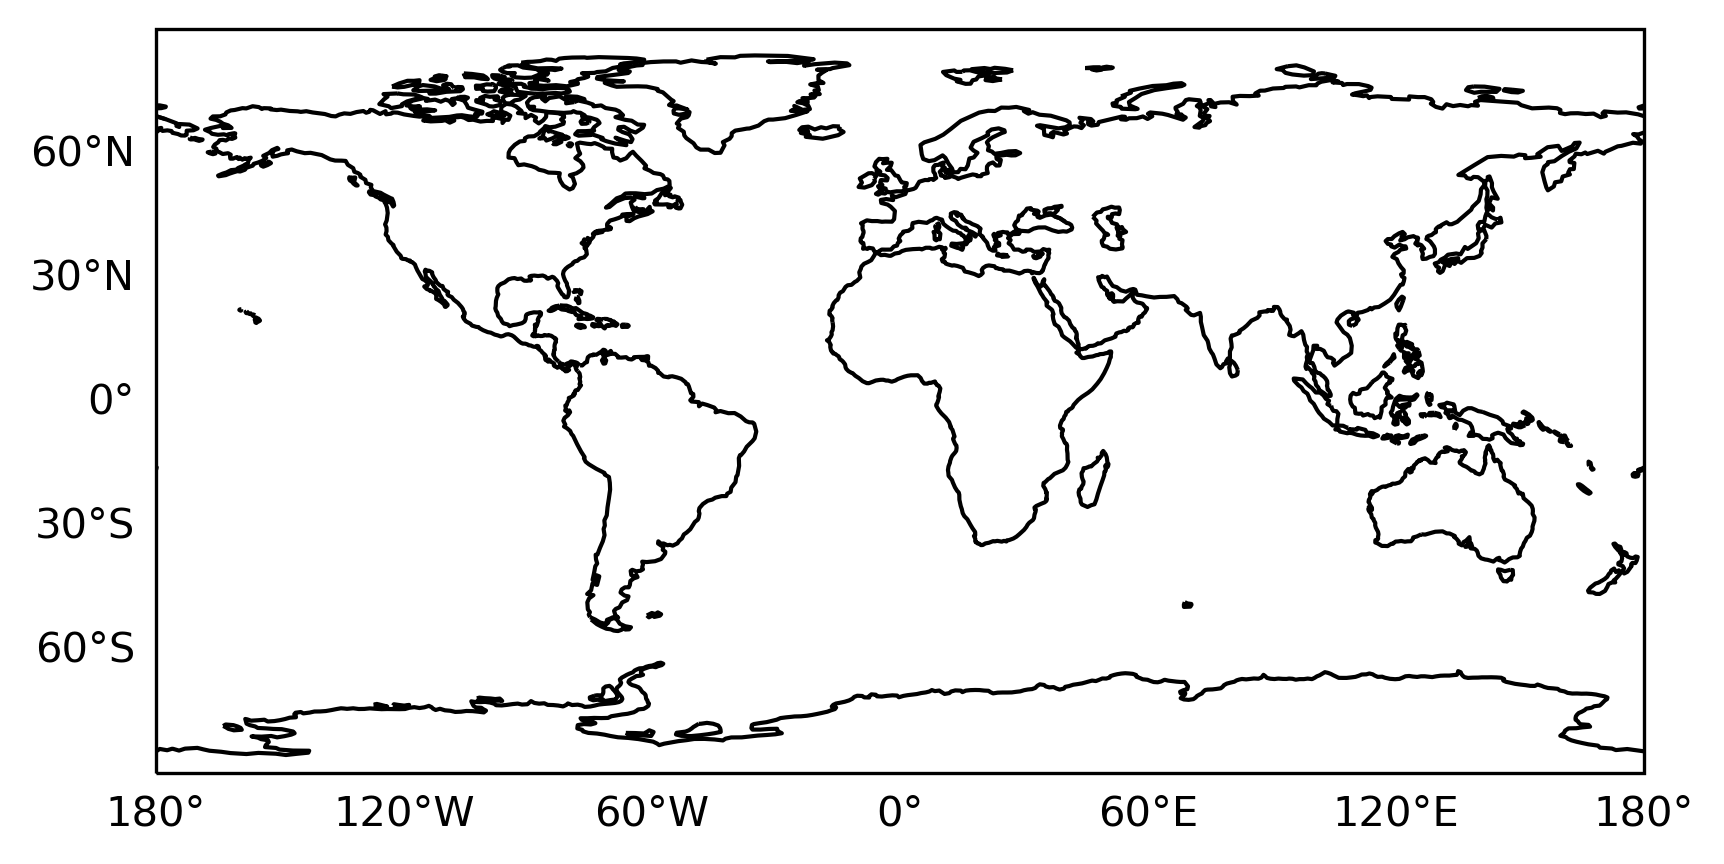

In [17]:
ax = plt.axes(projection = ccrs.PlateCarree())
gls = ax.gridlines(draw_labels=True, color="none") #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax.coastlines()
VMS.plot(cmap='RdBu_r') # 'RdBu', 'RdBu_r' are the best colourmaps, BrBG
plt.show()

In [19]:
VMS.values

KeyboardInterrupt: 